# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Deepak Singh Bisht

# **Project Summary -**

The aim of this project is to develop a robust credit card default prediction model using historical data from a financial institution. By leveraging various client attributes, payment history, and billing statements, the project seeks to accurately predict the likelihood of a client defaulting on their credit card payments. Through the implementation of advanced machine learning techniques, the model aims to provide valuable insights for risk assessment and proactive measures to minimize financial losses for the institution.

# **GitHub Link -**

[bisht-deepak/Capstone-Project-Classification](https://github.com/bisht-deepak/Capstone-Project-Classification)

# **Problem Statement -**
The financial institution faces significant challenges in managing credit card default risk, which can lead to substantial financial losses. The lack of a reliable and accurate system for predicting client defaults has resulted in inefficiencies in risk management and a subsequent increase in non-performing assets. The primary goal of this project is to develop a predictive model that can effectively identify clients at a higher risk of default based on their historical credit card usage patterns, payment behaviors, and other relevant attributes. By accurately identifying potential defaulters, the institution can proactively implement risk mitigation strategies and optimize its credit assessment process, ultimately minimizing financial losses and ensuring a more stable and secure credit portfolio.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
#dataframe manipulation libraries
import pandas as pd
import numpy as np

#data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

#for vif calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

#progressbar and time library
from tqdm import tqdm

#ignore warnings
import warnings
warnings.filterwarnings("ignore", category= UserWarning)

#for hypothesis testing
from scipy import stats

#model building libraries
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import clone

#feature manipulation and transformation
from sklearn.preprocessing import (
    FunctionTransformer, PowerTransformer, OneHotEncoder, OrdinalEncoder, LabelEncoder)
from sklearn.impute import SimpleImputer

#feature selection and extraction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

#metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, 
    PrecisionRecallDisplay, RocCurveDisplay)


#cross-validation library
from skopt import BayesSearchCV
from skopt.space import (
    Categorical, Integer, Real)

#importing models
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import (
    GaussianNB, BernoulliNB)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

### Dataset Loading

In [6]:
# Load Dataset
df= pd.read_csv("/kaggle/input/credit-card-defaulter-prediction/Credit Card Defaulter Prediction.csv").drop(columns= ["ID"])

### Dataset First View

In [7]:
# Dataset First Look
df.head()

LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
0      20000   F  University  Married   24      2      2     -1     -1     -2   
1     120000   F  University   Single   26     -1      2      0      0      0   
2      90000   F  University   Single   34      0      0      0      0      0   
3      50000   F  University  Married   37      0      0      0      0      0   
4      50000   M  University  Married   57     -1      0     -1      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default   
0         0         0         0         Y  
1      1000         0      2000         Y  
2      1000      1000      5000         N  
3      1100      1069      1000         N  
4      9000       689       679         N  

[5 rows x 24 columns]

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(30000, 24)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

35

In [11]:
#dropping duplicate values

df= df.drop_duplicates(ignore_index= True)
df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

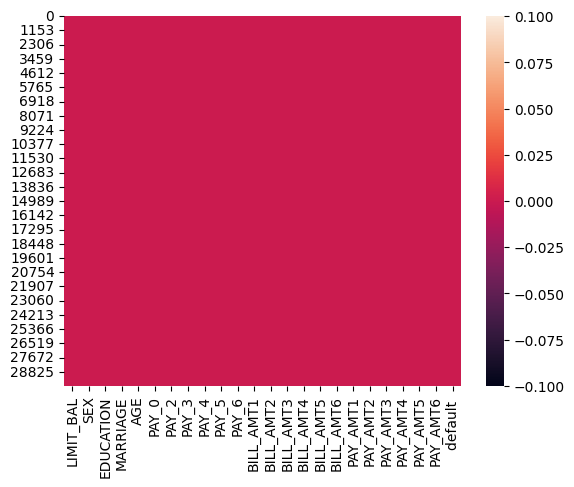

In [13]:
# Visualizing the missing values
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

The dataset has 24 features, including the target variable with 30000 entries, with 35 duplicate values. There are no null values.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns= df.columns.str.strip().str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include= "all")

limit_bal    sex   education marriage           age  \
count     29965.000000  29965       29965    29965  29965.000000   
unique             NaN      2           6        4           NaN   
top                NaN      F  University   Single           NaN   
freq               NaN  18091       14019    15945           NaN   
mean     167442.005006    NaN         NaN      NaN     35.487969   
std      129760.135222    NaN         NaN      NaN      9.219459   
min       10000.000000    NaN         NaN      NaN     21.000000   
25%       50000.000000    NaN         NaN      NaN     28.000000   
50%      140000.000000    NaN         NaN      NaN     34.000000   
75%      240000.000000    NaN         NaN      NaN     41.000000   
max     1000000.000000    NaN         NaN      NaN     79.000000   

               pay_0         pay_2         pay_3         pay_4         pay_5  \
count   29965.000000  29965.000000  29965.000000  29965.000000  29965.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       -0.016753     -0.131854     -0.164392     -0.218922     -0.264509   
std         1.123492      1.196322      1.195878      1.168175      1.132220   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.000000      0.000000      0.000000      0.000000      0.000000   
max         8.000000      8.000000      8.000000      8.000000      8.000000   

        ...      bill_amt4      bill_amt5      bill_amt6       pay_amt1  \
count   ...   29965.000000   29965.000000   29965.000000   29965.000000   
unique  ...            NaN            NaN            NaN            NaN   
top     ...            NaN            NaN            NaN            NaN   
freq    ...            NaN            NaN            NaN            NaN   
mean    ...   43313.329885   40358.334390   38917.012281    5670.099316   
std     ...   64353.514373   60817.130623   59574.147742   16571.849467   
min     ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%     ...    2360.000000    1787.000000    1262.000000    1000.000000   
50%     ...   19081.000000   18130.000000   17124.000000    2102.000000   
75%     ...   54601.000000   50247.000000   49252.000000    5008.000000   
max     ...  891586.000000  927171.000000  961664.000000  873552.000000   

            pay_amt2       pay_amt3       pay_amt4       pay_amt5  \
count   2.996500e+04   29965.000000   29965.000000   29965.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    5.927983e+03    5231.688837    4831.617454    4804.897047   
std     2.305346e+04   17616.361124   15674.464538   15286.372298   
min     0.000000e+00       0.000000       0.000000       0.000000   
25%     8.500000e+02     390.000000     300.000000     261.000000   
50%     2.010000e+03    1804.000000    1500.000000    1500.000000   
75%     5.000000e+03    4512.000000    4016.000000    4042.000000   
max     1.684259e+06  896040.000000  621000.000000  426529.000000   

             pay_amt6  default  
count    29965.000000    29965  
unique            NaN        2  
top               NaN        N  
freq              NaN    23335  
mean      5221.498014      NaN  
std      17786.976864      NaN  
min          0.000000      NaN  
25%        131.000000      NaN  
50%       1500.000000      NaN  
75%       4000.000000      NaN  
max     528666.000000      NaN  

[11 rows x 24 columns]

### Variables Description 

|Variable|Description|Unit/Categories|
|--------|-----------|----|
|limit_bal| Amount of given credit|NT dollars|
|sex|Sex of the Client|M: Male, F: Female|
|education|Educational Qualification of the Client|University, Graduate School, High School, Others, 0, Unknown|     
|marriage|Marital Status of the Client|Single, Married, Other, 0|       
|age|Age of the Client|years|
|pay_0|Repayment status in September, 2005|-1:pay duly, 1:payment delay for one month, 2:payment delay for two months,3:payment delay for three months and so on.|
|pay_2|Repayment status in August, 2005|scale same as above|
|pay_3|Repayment status in July, 2005|scale same as above|
|pay_4|Repayment status in June, 2005|scale same as above|
|pay_5|Repayment status in May, 2005|scale same as above|
|pay_6|Repayment status in April, 2005|scale same as above|
|bill_amt1|Amount of bill statement in September, 2005|NT dollar|
|bill_amt2|Amount of bill statement in August, 2005|NT dollar|
|bill_amt3|Amount of bill statement in July, 2005|NT dollar|
|bill_amt4|Amount of bill statement in June, 2005|NT dollar|
|bill_amt5|Amount of bill statement in May, 2005|NT dollar|
|bill_amt6|Amount of bill statement in April, 2005|NT dollar|
|pay_amt1|Amount of previous payment in September, 2005 |NT dollar|
|pay_amt2|Amount of previous payment in August, 2005 |NT dollar|
|pay_amt3|Amount of previous payment in July, 2005|NT dollar|
|pay_amt4|Amount of previous payment in June, 2005|NT dollar|
|pay_amt5|Amount of previous payment in May, 2005|NT dollar|
|pay_amt6|Amount of previous payment in April, 2005 |NT dollar|
|default|Whether the client has defaulted on loan payment|0- Not Defaulted,1- Defaulted|

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
df.apply(lambda x: x.nunique())

limit_bal       81
sex              2
education        6
marriage         4
age             56
pay_0           11
pay_2           11
pay_3           11
pay_4           11
pay_5           10
pay_6           10
bill_amt1    22723
bill_amt2    22346
bill_amt3    22026
bill_amt4    21548
bill_amt5    21010
bill_amt6    20604
pay_amt1      7943
pay_amt2      7899
pay_amt3      7518
pay_amt4      6937
pay_amt5      6897
pay_amt6      6939
default          2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
df= (
    df
    .astype({
        cat_column: "category" for cat_column in ["sex", "education", "marriage", "pay_0", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6", "default"]
    })
    .rename(columns= {"pay_0": "pay_1"})
)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   limit_bal  29965 non-null  int64   
 1   sex        29965 non-null  category
 2   education  29965 non-null  category
 3   marriage   29965 non-null  category
 4   age        29965 non-null  int64   
 5   pay_1      29965 non-null  category
 6   pay_2      29965 non-null  category
 7   pay_3      29965 non-null  category
 8   pay_4      29965 non-null  category
 9   pay_5      29965 non-null  category
 10  pay_6      29965 non-null  category
 11  bill_amt1  29965 non-null  int64   
 12  bill_amt2  29965 non-null  int64   
 13  bill_amt3  29965 non-null  int64   
 14  bill_amt4  29965 non-null  int64   
 15  bill_amt5  29965 non-null  int64   
 16  bill_amt6  29965 non-null  int64   
 17  pay_amt1   29965 non-null  int64   
 18  pay_amt2   29965 non-null  int64   
 19  pay_amt3   29965 non-null

### What all manipulations have you done and insights you found?

Columns- "sex", "education", "marriage", "pay_0" through "pay_6" and "default" are all categorical features, and hence their dtype has been changed accordingly.  
Column "pay_0" is not aligned with the nomenclature used for other columns and hence renamed to "pay_1".  

In [19]:
#making a copy of df for later use in model building
df_model= df.copy()

In [20]:
#list of numeric columns
numerical_cols= list(df.select_dtypes(np.number).columns)
#list of categorical columns
categorical_cols= list(df.select_dtypes("category").columns)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1
Visualizing the Distribution of Numerical Features Using Histogram

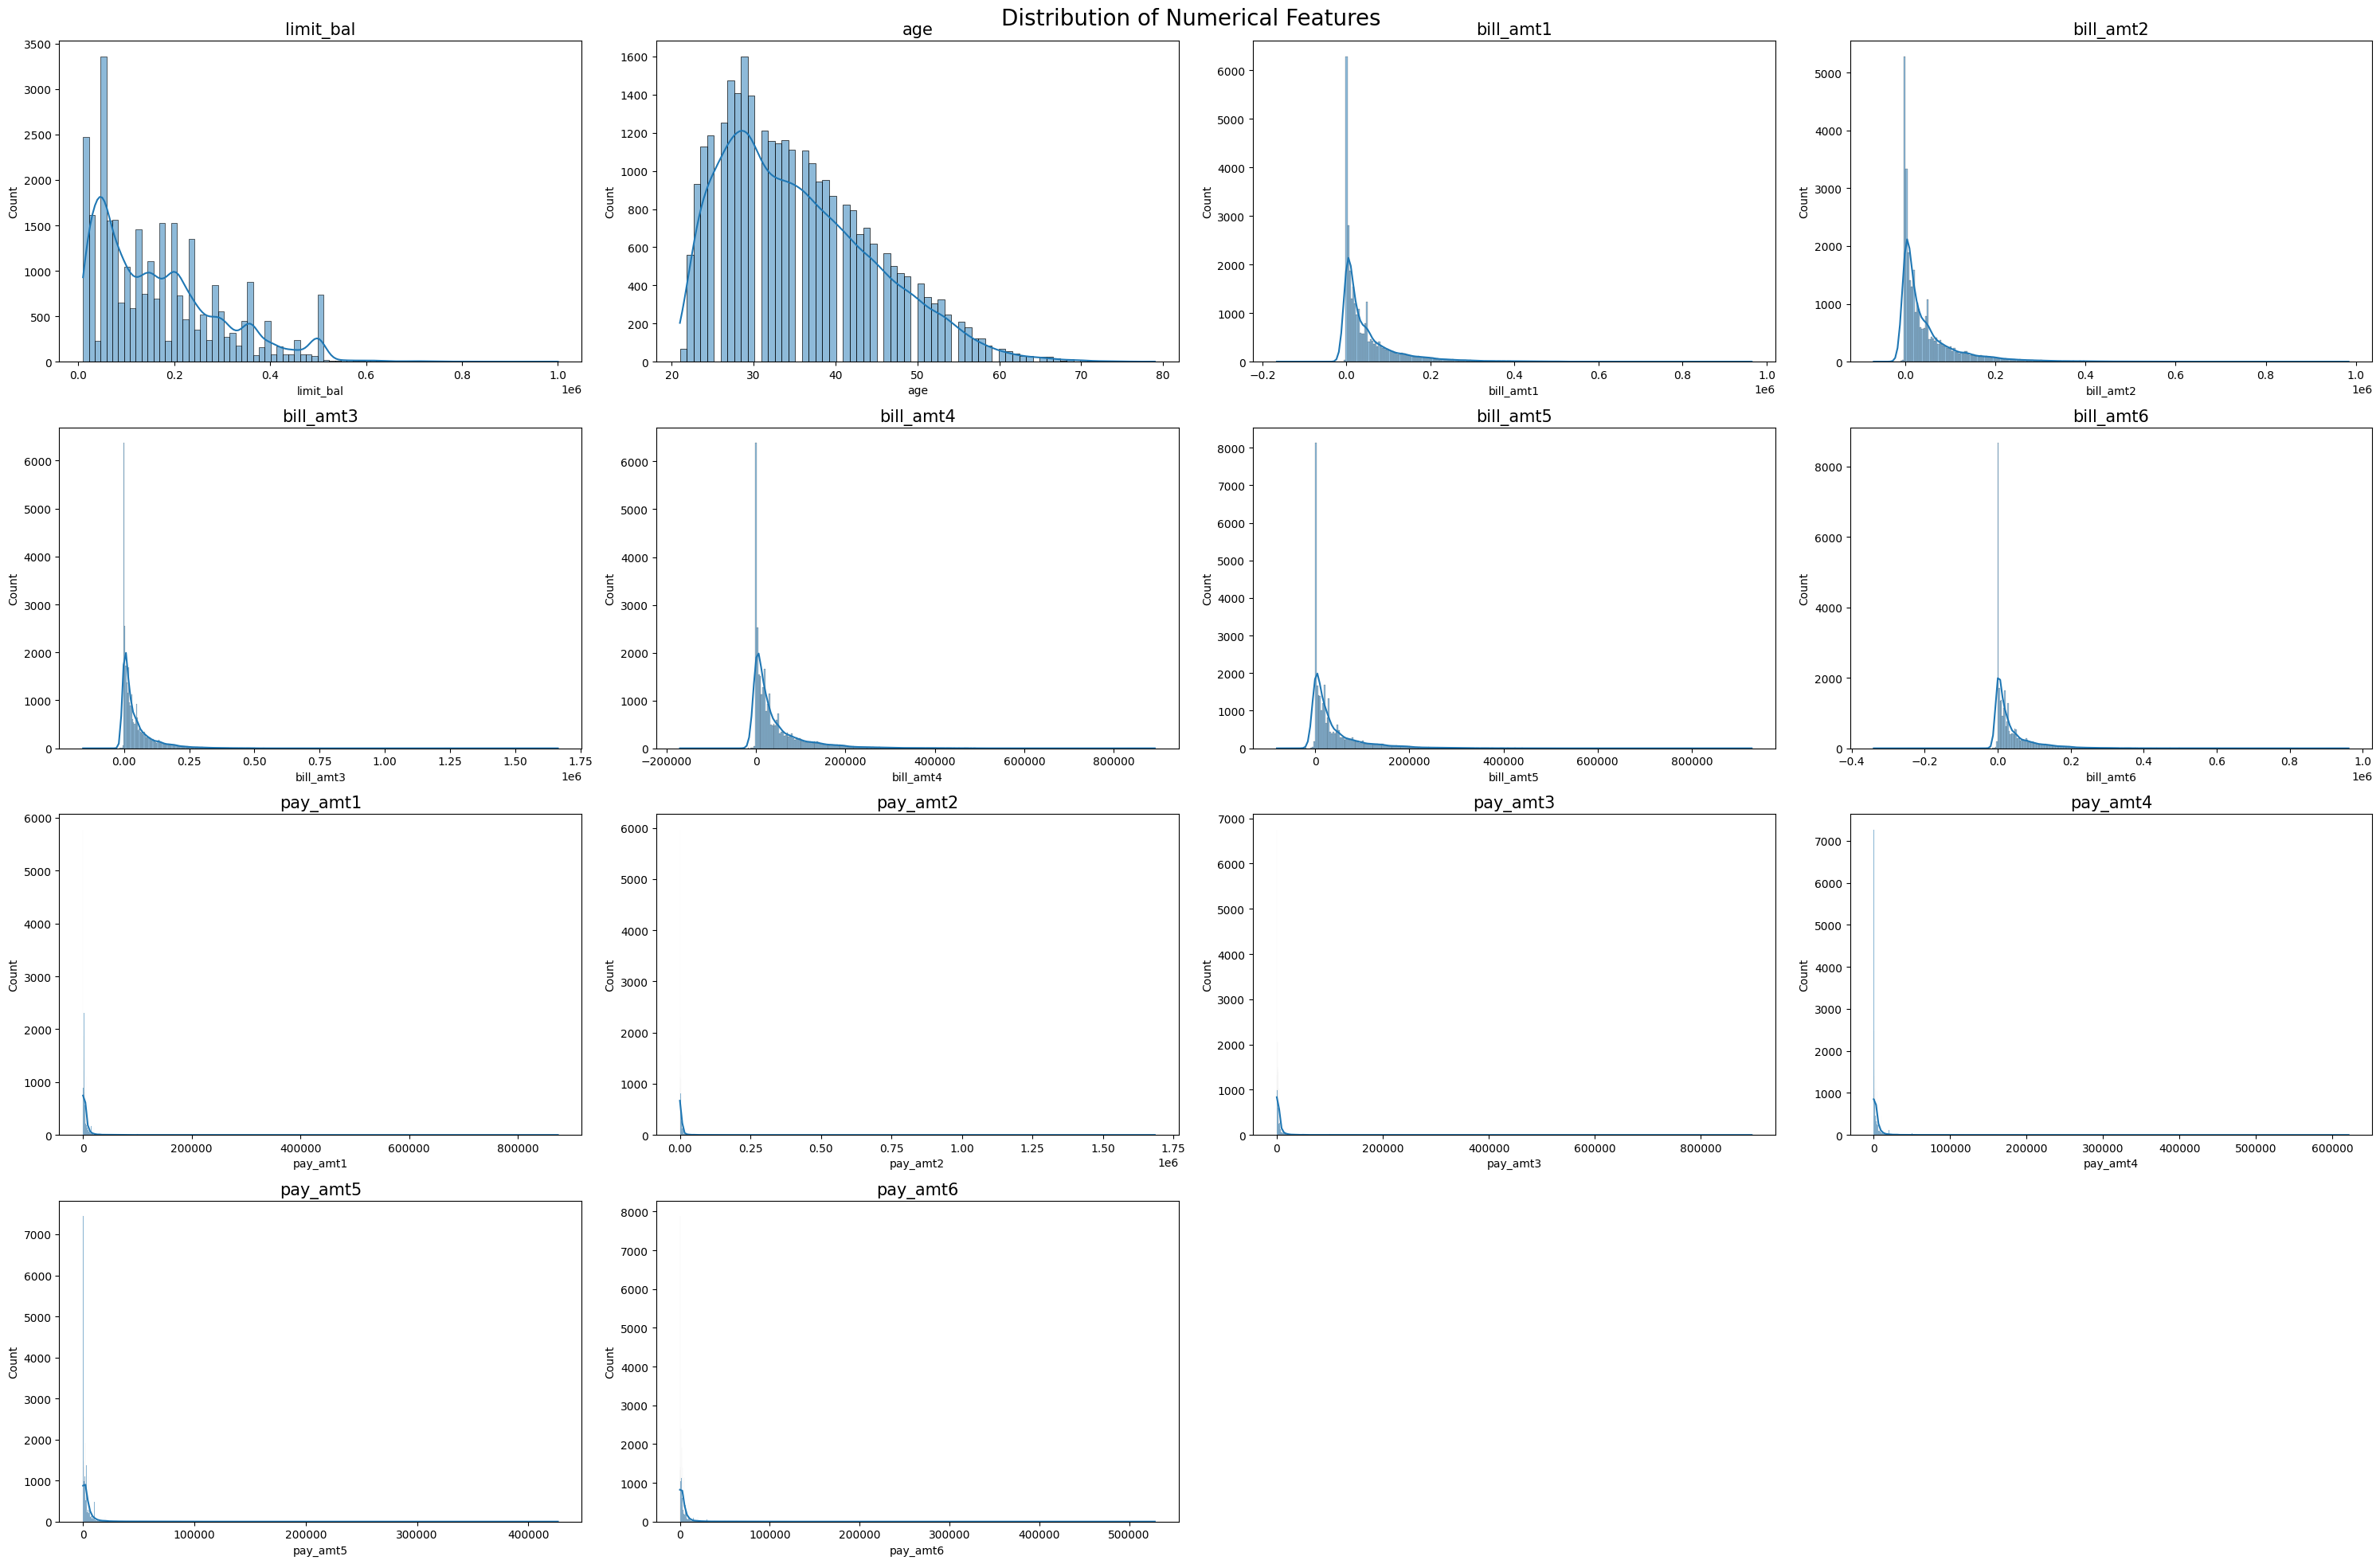

In [21]:
# Chart - 1 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(data= df, x= col, kde= True, ax= axes[i])
    axes[i].set_title(col, fontsize= 15)

# Removing extra subplots
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

    
#aesthetics
plt.suptitle("Distribution of Numerical Features", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are suitable for visualizing the distribution of numerical data, making them an excellent choice for exploring the distributions of features like "limit_bal", "age", "bill_amt1" through "bill_amt6", and "pay_amt1" through "pay_amt6". They allow for easy identification of patterns such as skewness, central tendency, and presence of outliers within each feature.

##### 2. What is/are the insight(s) found from the chart?

1. All the numerical columns are right-skewed, indicating that the majority of the data points are clustered towards the lower values, with a long tail of higher values.  
2. The variables related to bill amounts (bill_amt1 to bill_amt6) and payment amounts (pay_amt1 to pay_amt6) exhibit a peak at 0, suggesting that a significant number of customers have either not utilized their credit or have made minimal payments in these periods.  
3. The histograms for bill_amt and pay_amt columns show a narrowing of bars toward the peak as the time progresses from earlier months to later months. This pattern suggests a potential trend of decreasing bill amounts and payment amounts over time for the respective periods.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the skewed nature of the data and the concentration of values at 0 can help in formulating targeted strategies for different customer segments. For instance, customers with consistently low bill amounts might be targeted for specific promotional offers or credit utilization campaigns.  
The trend of decreasing bill and payment amounts over time could provide insights into the changing financial behaviors of customers. This information might be used to design tailored financial products or services that cater to evolving customer needs and preferences.  
Regarding the negative impact, the concentration of values at 0 might suggest a significant number of customers who are either not actively using their credit or are facing financial challenges, which could potentially lead to decreased revenue if not appropriately managed. It's important to devise strategies to encourage active credit utilization while ensuring responsible borrowing practices.


#### Chart - 2
Visualizing QQ plots for Numerical Columns

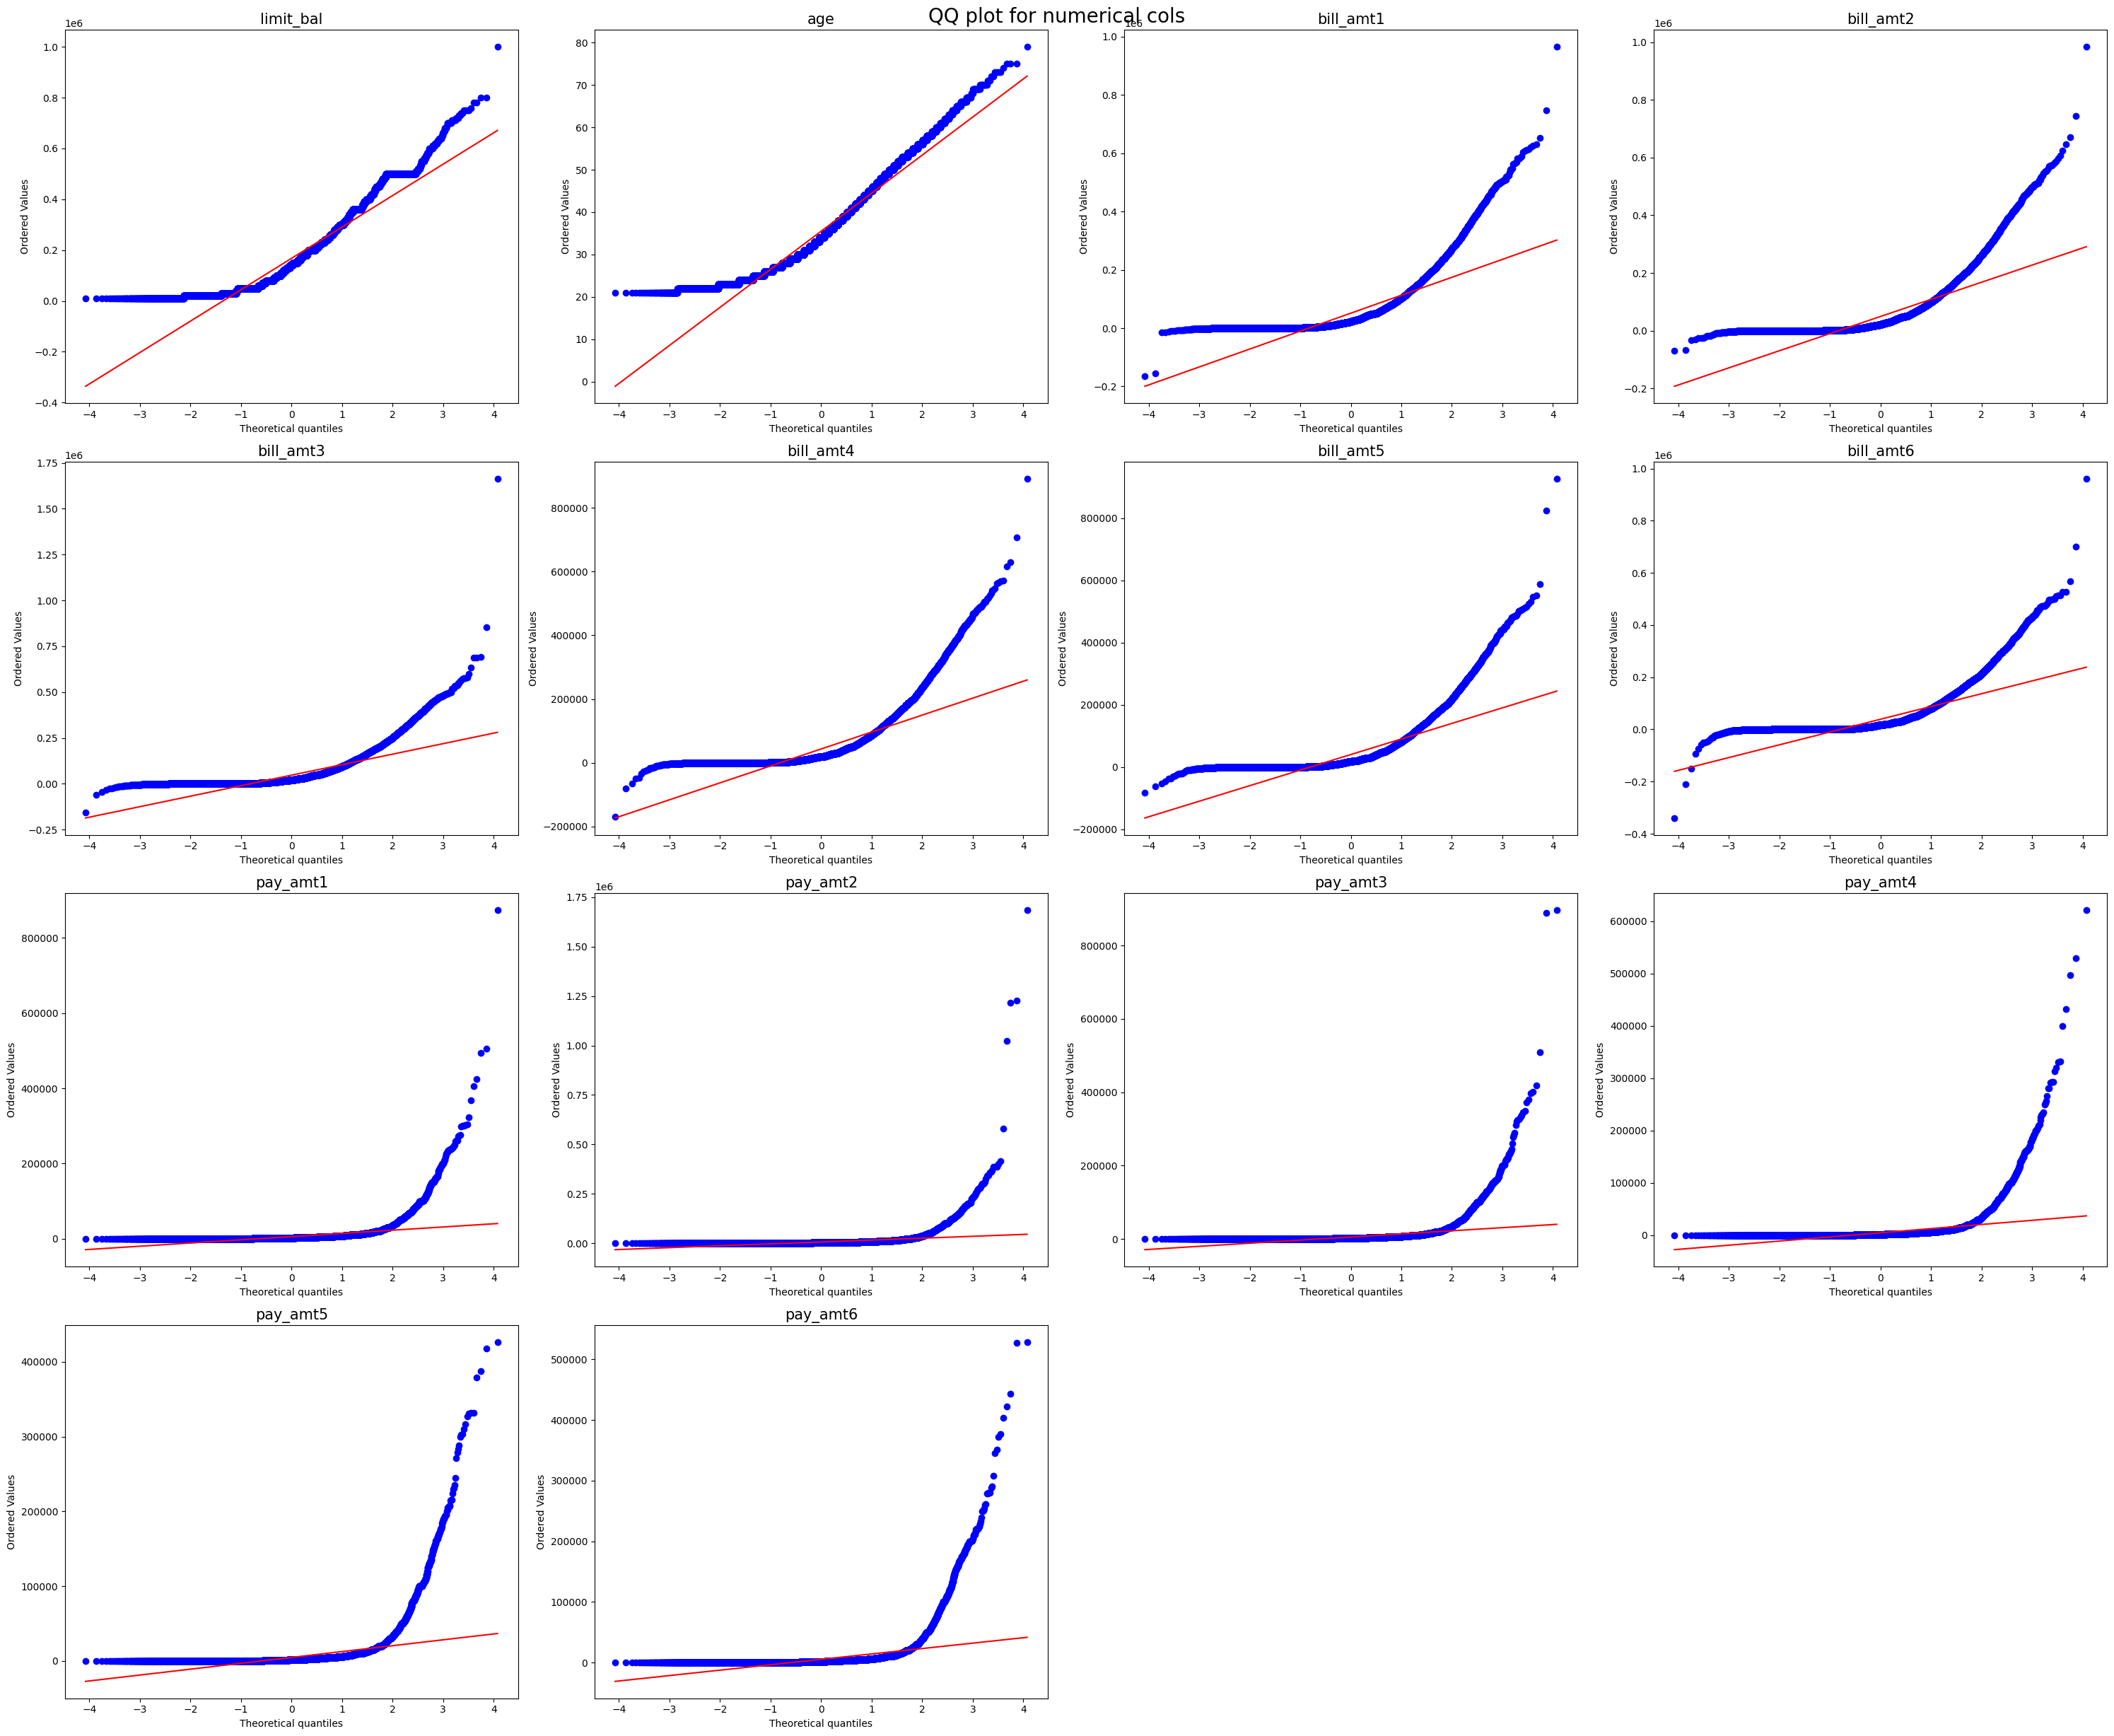

In [22]:
# Chart - 2 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 25))
axes= axes.flatten()


# Plotting QQ plots for each numerical column
for i, col in enumerate(numerical_cols):
    stats.probplot(x= df[col], plot= axes[i])
    axes[i].set_title(col, fontsize= 15)
    
# Removing extra subplots 
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

#aesthetics
plt.suptitle("QQ plot for numerical cols", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

QQ plots are typically used to assess whether a given data follows a normal distribution. By utilizing QQ plots, you can visually inspect how well the data conforms to the theoretical quantiles of a normal distribution.

##### 2. What is/are the insight(s) found from the chart?

1. For the 'limit_bal' variable, the QQ plot indicates a mostly normal distribution, except for the deviation observed at the lowest value, which is 0. Similarly, for the 'age' variable, the plot indicates a nearly normal distribution, except for the deviation observed at the age of 20, likely due to the minimum age requirement for credit cards.  
2. The QQ plots for the 'bill_amt' variables suggest a departure from normal distribution, as indicated by the upward U-shaped curve. This observation implies that the distribution of these variables is not in line with a normal distribution pattern.  
3. The QQ plots for the 'pay_amt' variables generally adhere to the normal distribution diagonal line. However, some of the values at the extreme ends of the graph exhibit significant deviation from this line, indicating potential outliers or non-normal behavior in those specific cases.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the deviation of certain variables from the normal distribution line can provide valuable insights into the distribution patterns of credit usage and repayment behavior. This information can be utilized to design more accurate and effective risk assessment models, which can help in identifying potential defaulters and managing credit risks more efficiently.  
The identification of outliers or deviations from the normal distribution can aid in the development of more robust models that can better handle non-standard data points, thereby improving the accuracy of predictions and risk management strategies.  
Regarding the negative impact, the deviations from normal distribution patterns might indicate potential inconsistencies or anomalies within the dataset, which could affect the reliability of the models built on this data. It's crucial to identify and address these issues to ensure the accuracy and reliability of the credit card default prediction model.  

#### Chart - 3
Visualizing Outliers for Numerical Features using Box Plots

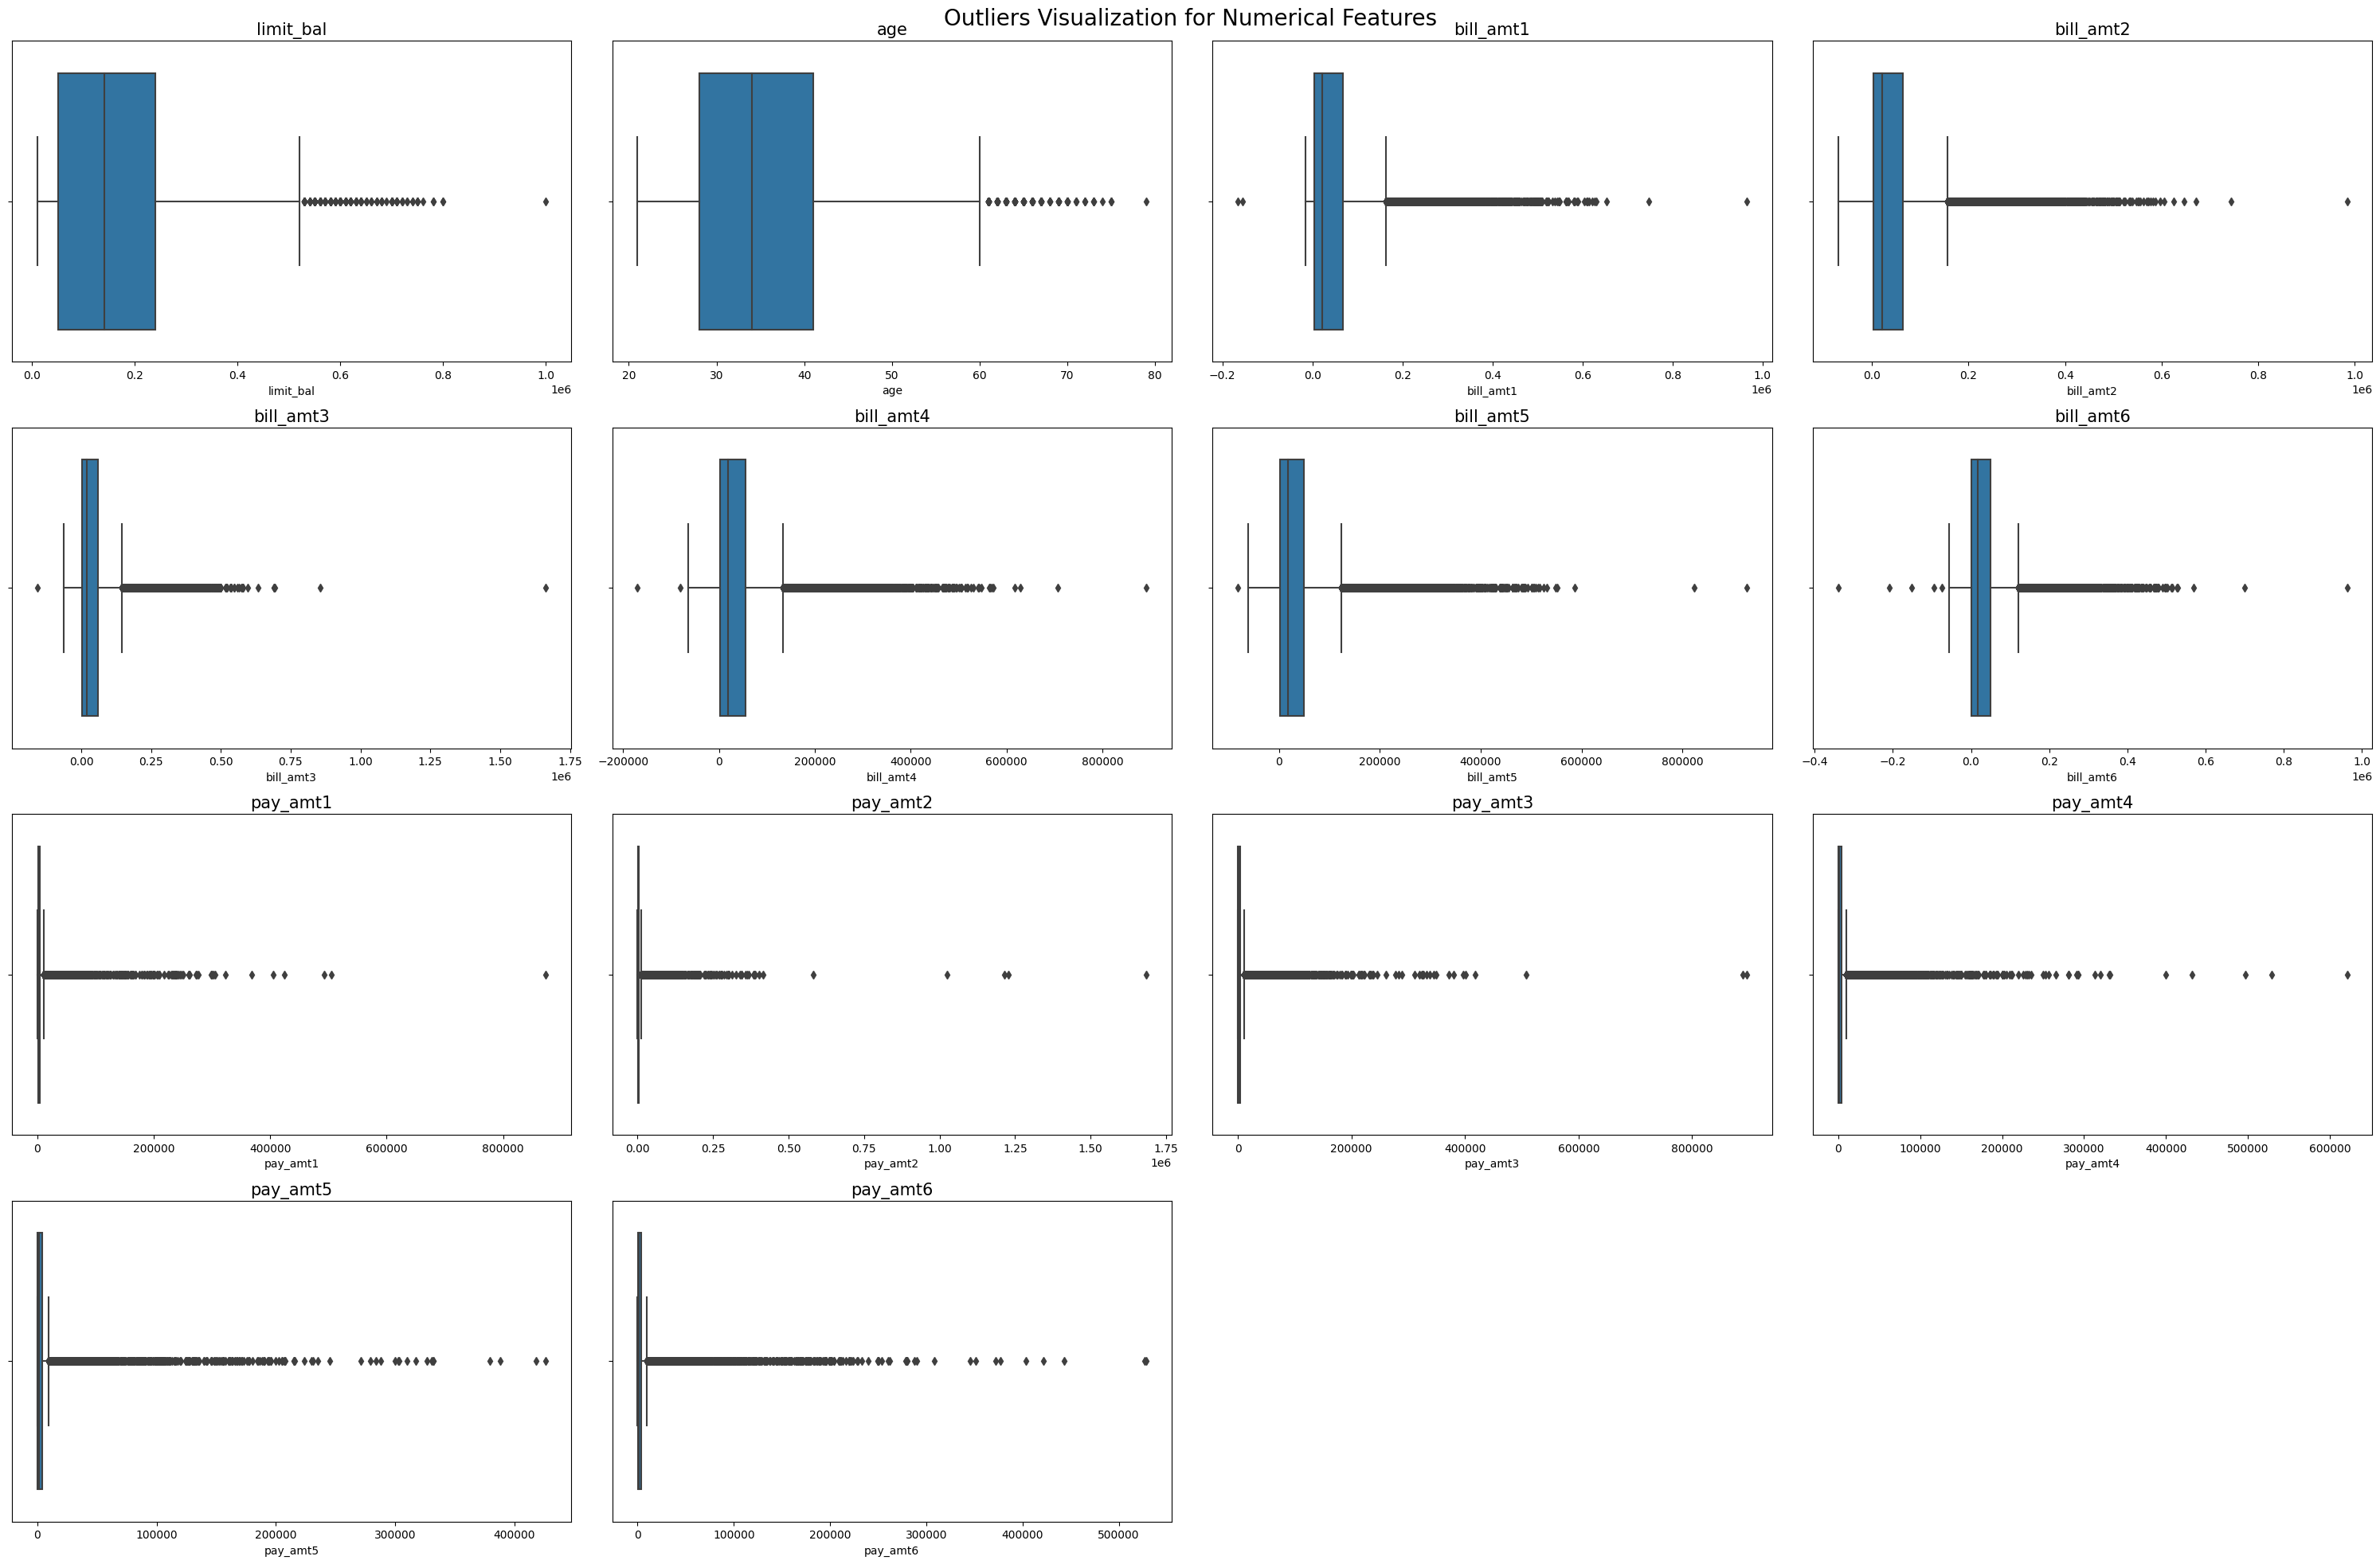

In [23]:
# Chart - 3 visualization code
fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()


# Plotting box plots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(data= df, x= col, ax= axes[i])
    axes[i].set_title(col, fontsize= 15)

# Removing any extra subplots
for i in range(len(numerical_cols), 16): 
    fig.delaxes(axes[i])

#aesthetics
plt.suptitle("Outliers Visualization for Numerical Features", fontsize= 20)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are a suitable choice for identifying the presence of outliers and understanding the distribution of numerical data. They provide information about the data's central tendency, dispersion, and skewness, as well as the presence of potential outliers.

##### 2. What is/are the insight(s) found from the chart?

1. The box plots for all the numerical columns reveal the existence of outliers in the dataset. This indicates the presence of data points that significantly deviate from the overall pattern, potentially indicating unusual or extreme values in the dataset.  
2. The narrowing of the boxes as we move from 'bill_amt1' to 'bill_amt6' and 'pay_amt1' to 'pay_amt6' suggests a reduction in the variability of the data over time, indicating a potential trend of decreasing bill amounts and payment amounts over the specified periods.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying outliers can be crucial in assessing potential anomalies or errors in the dataset. Proper handling of outliers is essential for ensuring the robustness and accuracy of predictive models, as outliers can significantly skew the results if not appropriately addressed.  
Understanding the decreasing variability in bill amounts and payment amounts over time can aid in formulating better strategies for managing credit and payment schedules. This information can help in designing more accurate and effective credit risk assessment models, leading to improved risk management and better decision-making processes.  
Regarding the negative impact, the presence of outliers, if not managed properly, can distort the results of the data analysis and affect the accuracy of predictive models, potentially leading to erroneous predictions and decision-making. It's essential to handle outliers effectively to ensure the reliability and robustness of the credit card default prediction model.  

#### Chart - 4
Visualizing the Distribution of Categorical Features using Count Plots

In [24]:
df["default"].value_counts()

default
N    23335
Y     6630
Name: count, dtype: int64

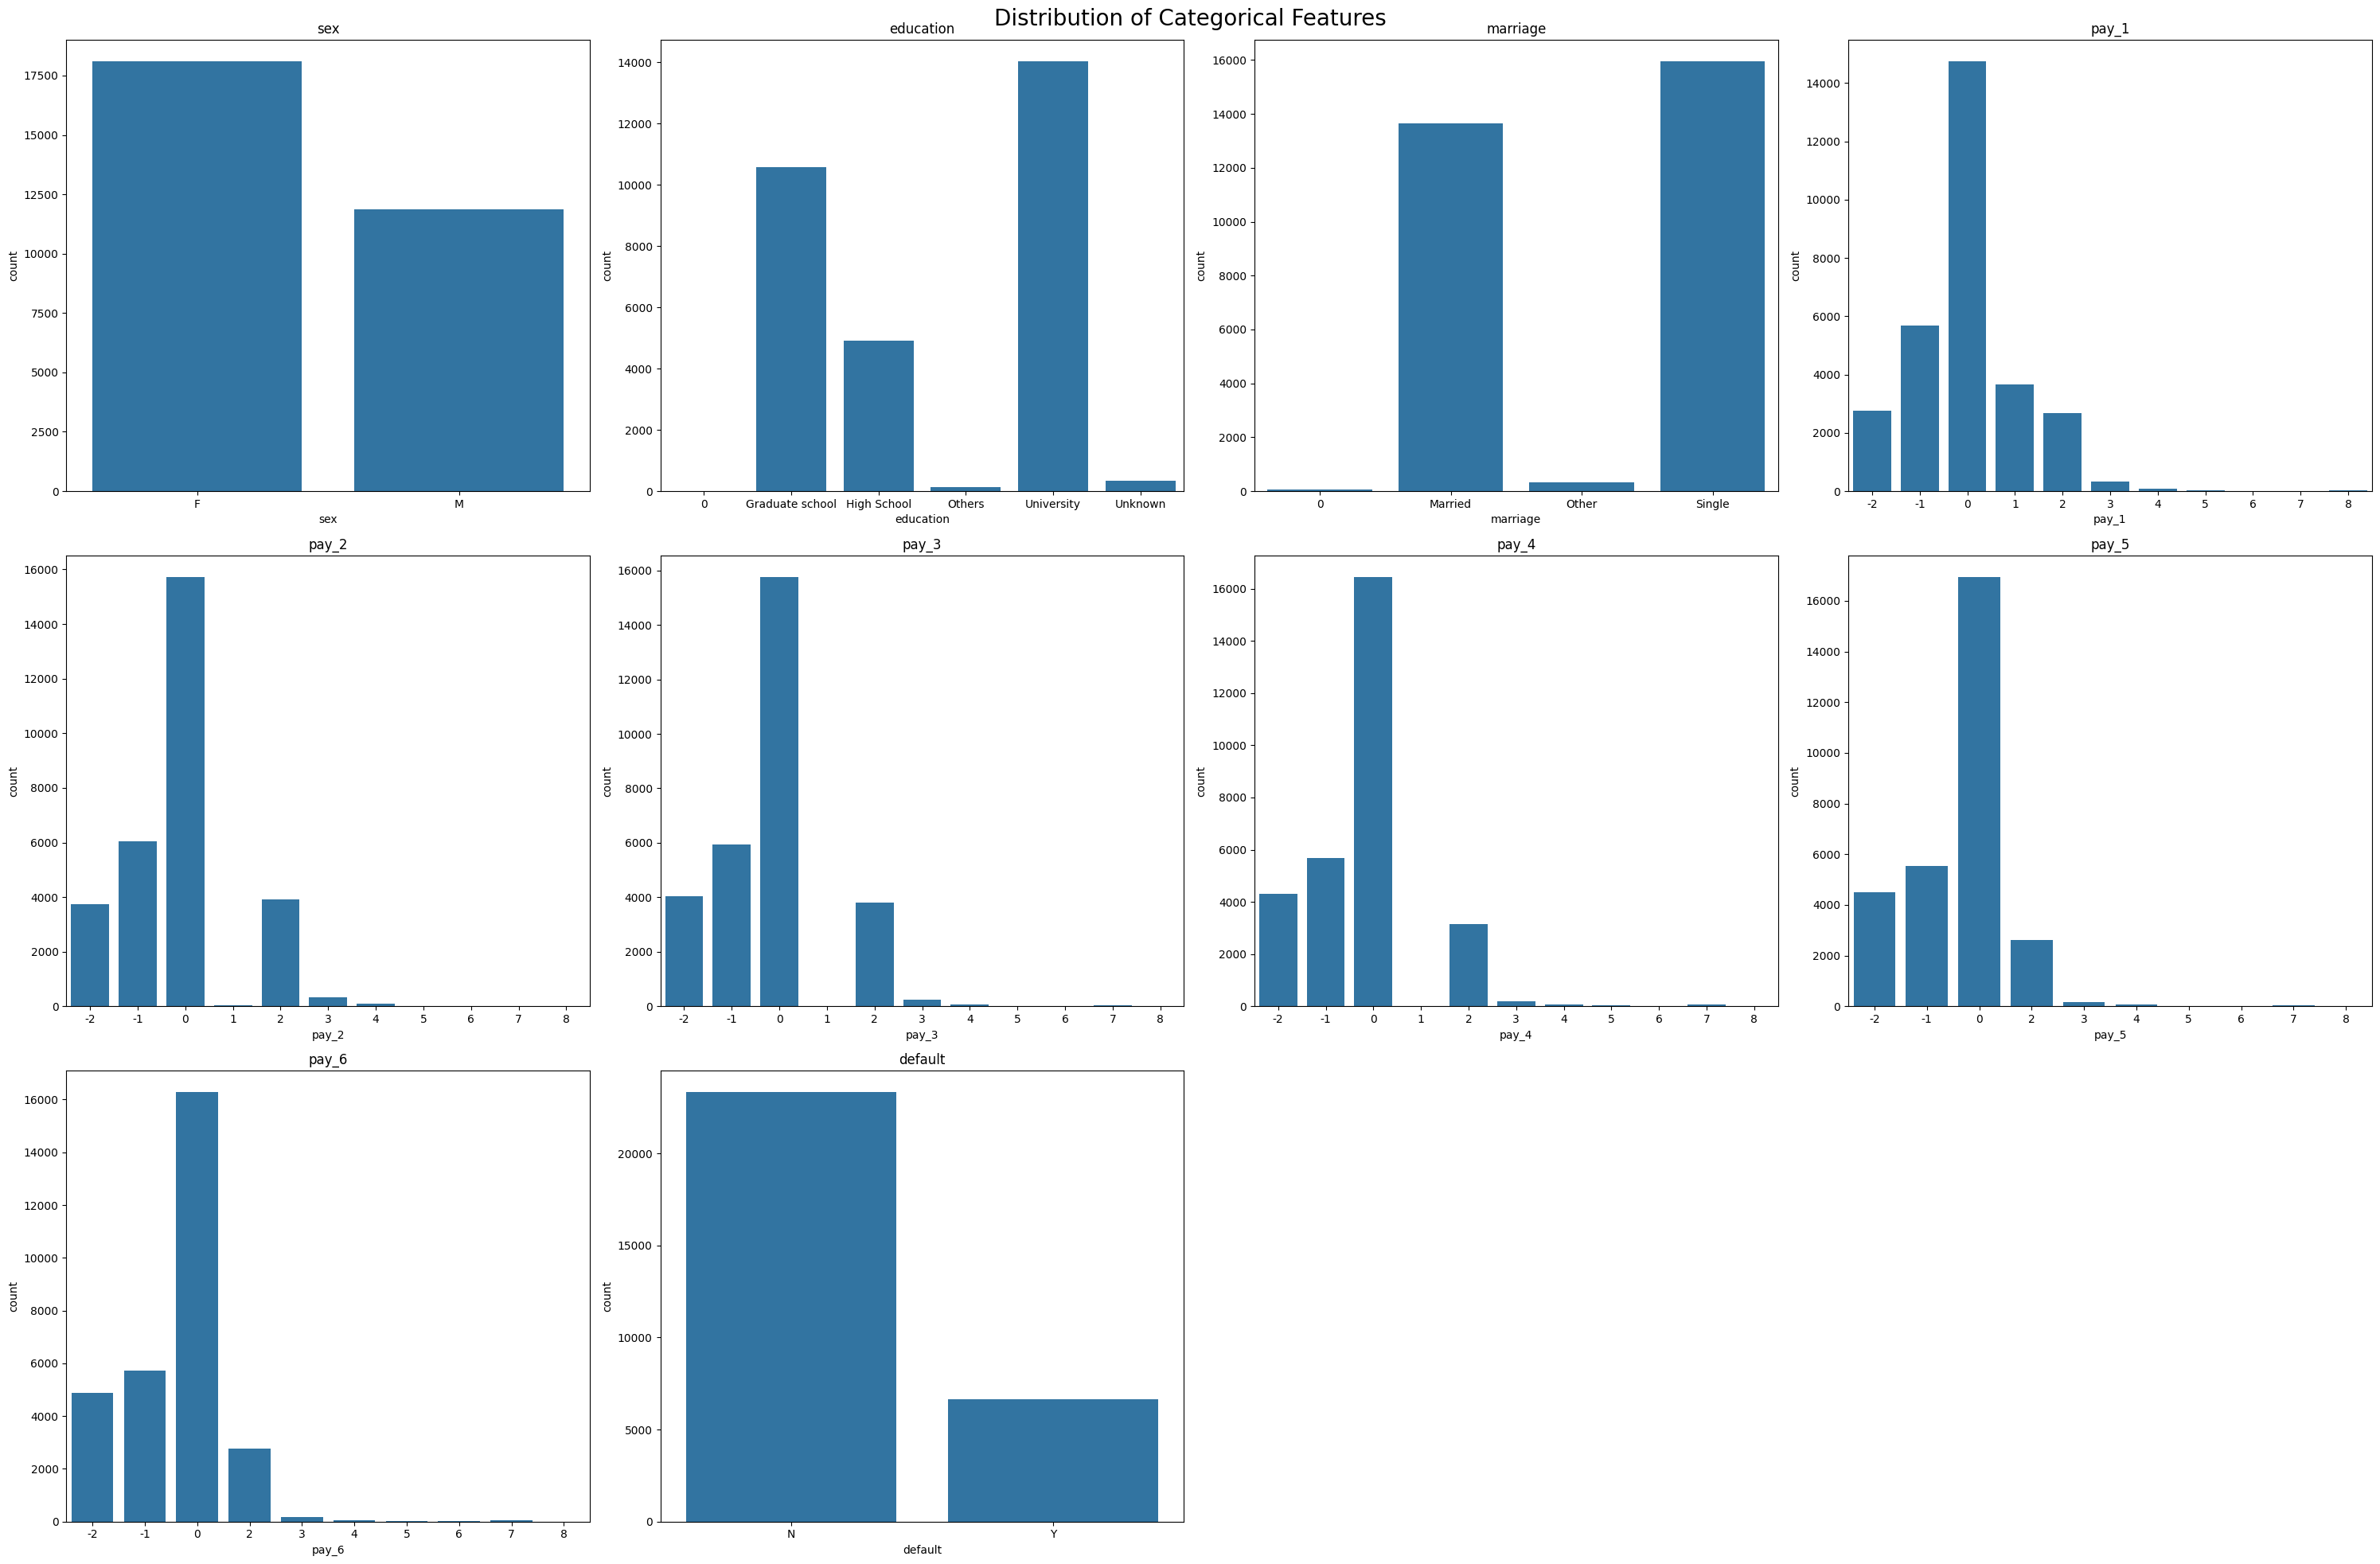

In [25]:
# Chart - 4 visualization code
fig, axes= plt.subplots(3, 4, figsize= (30, 20))
axes= axes.flatten()

# Plotting count plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(data= df, x= col, color= "#1f77b4", ax= axes[i])
    axes[i].set_title(col)
    
# Removing extra subplots
for i in range(len(categorical_cols), 12):
    fig.delaxes(axes[i])

#aesthetics
plt.suptitle("Distribution of Categorical Features", fontsize= 20)
    
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Count plots are an effective way to visualize the distribution of categorical data, providing insights into the frequency of each category within the dataset.

##### 2. What is/are the insight(s) found from the chart?

1. The count plot for the 'sex' variable indicates that the dataset contains a higher number of female clients (18091) compared to male clients (11874).
2. The 'education' variable includes a category labeled as 'Unknown,' which can be treated as a missing or null value. This suggests the presence of some missing or unspecified data points in the education category.
3. The count plots for the 'pay_' variables suggest that the peak value for most of these variables is 0, indicating that a significant number of clients make timely payments, which could be a positive indicator for credit management.
4. The count of defaults shows that there are 6630 instances of default (Y) and 23335 instances of non-default (N) in the dataset, signalling a huge imbalance in classes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution of categorical features can provide valuable insights into customer demographics and behaviors, enabling the development of targeted marketing strategies and customized financial products or services.
The identification of missing or unspecified data points can aid in implementing data imputation techniques to handle missing values effectively, leading to more accurate analyses and better-informed business decisions.  
The observation that the majority of clients make timely payments can be utilized to design customer retention strategies and encourage responsible borrowing behavior, leading to improved customer satisfaction and reduced credit risks.  

#### Chart - 5
Visualizing Proportions among Categorical Variables using Pie Charts

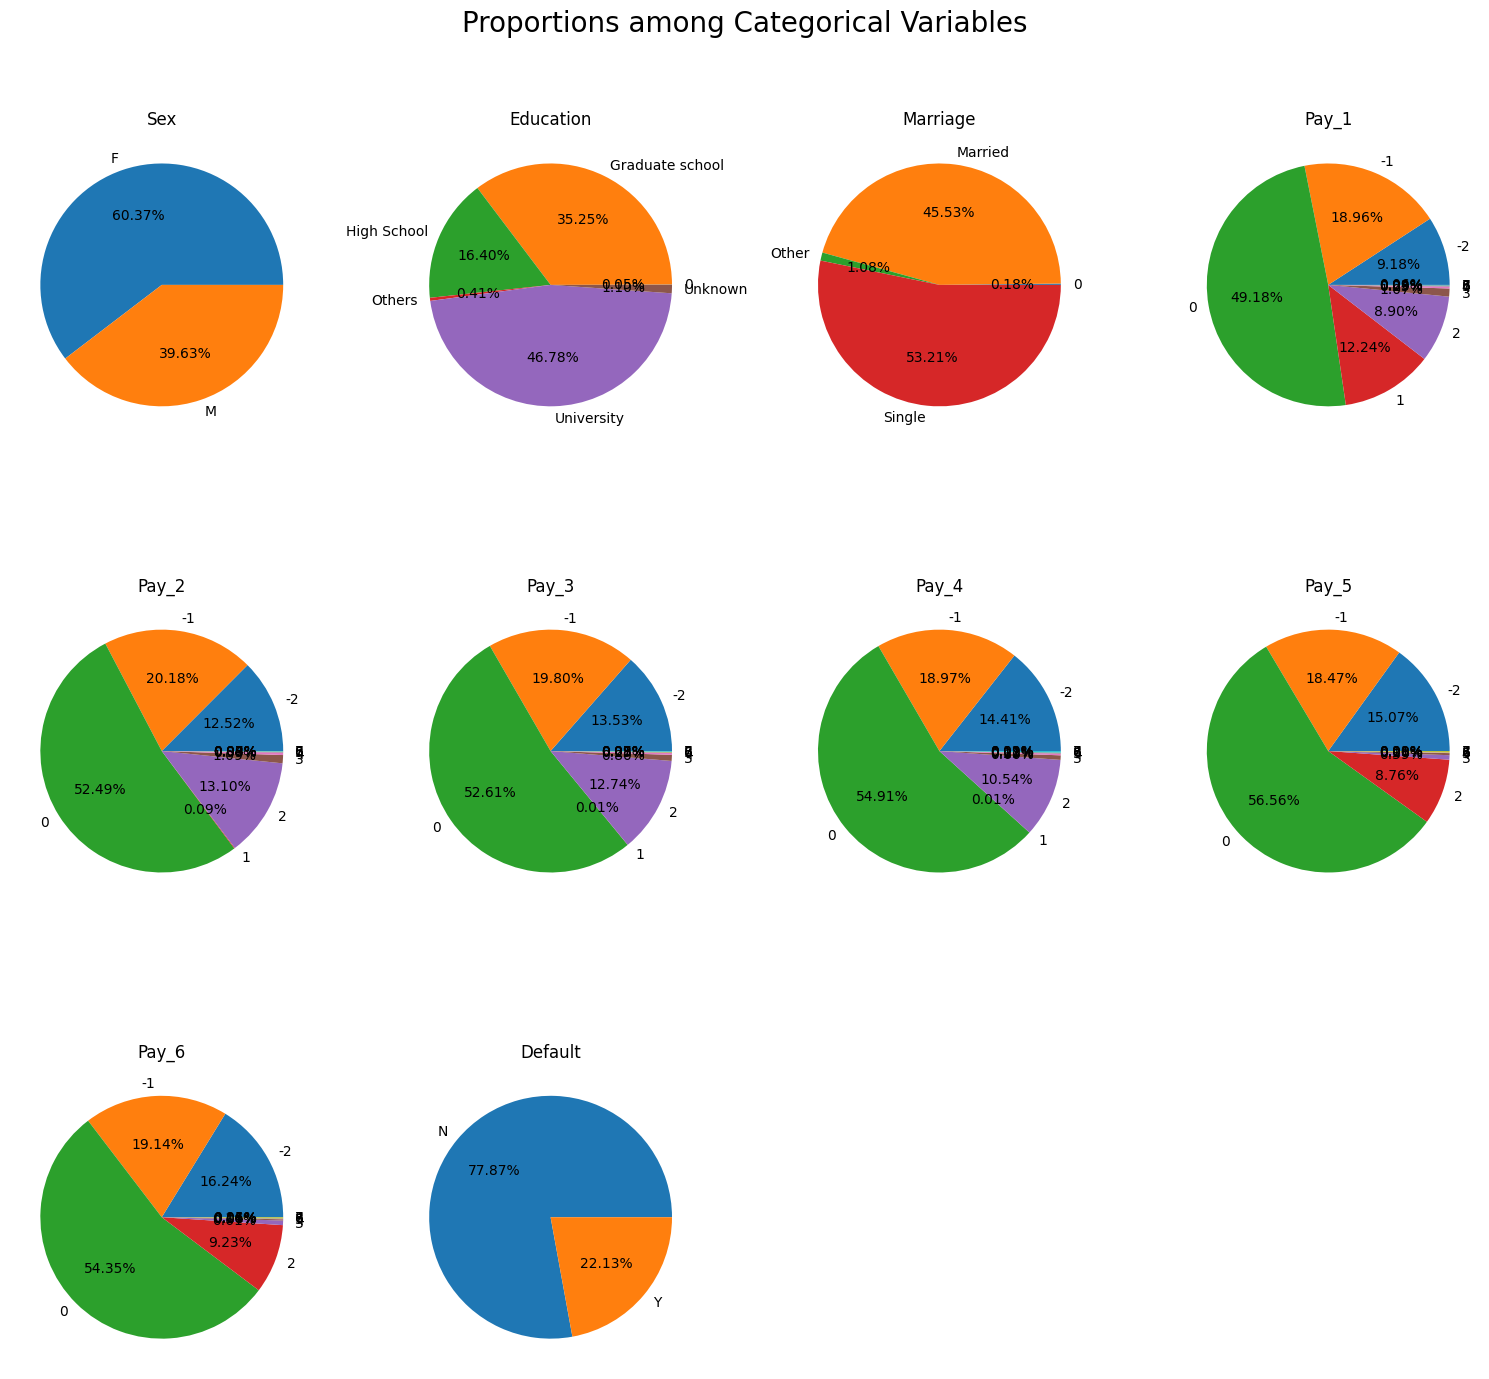

In [26]:
# Chart - 5 visualization code

fig, axes= plt.subplots(3, 4, figsize= (15, 15))
axes= axes.flatten()

# Generating pie charts for each categorical column
for i, col in enumerate(categorical_cols):
    pie_df= df.groupby(col).size().reset_index().rename(columns= {0: "size"})
    axes[i].pie(
        data= pie_df, labels= col, x= "size",
        autopct= "%.2f%%"
    )
    axes[i].set_title(col.title())
    
# Removing extra subplots    
for i in range(len(categorical_cols), 12):
    fig.delaxes(axes[i])
    
#aesthetics
plt.suptitle("Proportions among Categorical Variables", fontsize= 20)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are effective in showcasing proportions and percentages within categorical data, providing a clear visual representation of the distribution of categories.

##### 2. What is/are the insight(s) found from the chart?

1. The pie chart for the 'sex' variable reveals that approximately 60% of the clients are female, indicating a relatively higher representation of female clients in the dataset.
2. The pie charts for the 'education' and 'marriage' variables show that around 47% of clients have been to university, while 53% are single and 46% are married, respectively. These insights provide valuable demographic information about the clients' educational backgrounds and marital status.
3. The 'pay_' variables are predominantly dominated by the category '0,' covering over 50% of the area in each pie chart. This implies that a significant portion of the clients make timely payments or have no delay in payment for the specified periods.
4. The pie chart for the 'default' variable indicates that approximately 78% of the clients do not default on their payments, while the remaining 22% default. This provides insights into the overall default rate within the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the demographic distribution of clients based on gender, education, and marital status can aid in tailoring marketing strategies and designing financial products that cater to specific customer segments, leading to increased customer satisfaction and improved business performance.
The observation that a significant proportion of clients make timely payments can be leveraged to develop effective customer engagement strategies and encourage responsible financial behavior, leading to improved customer retention and reduced credit risks.  
The insight into the default rate can help in the development of more accurate credit risk assessment models and the implementation of proactive measures to minimize defaults, leading to improved portfolio management and reduced financial losses.

### Bivariate Analysis

#### Chart - 7
Generating Violin Plots for Comparison between Numerical Columns and Target Variable

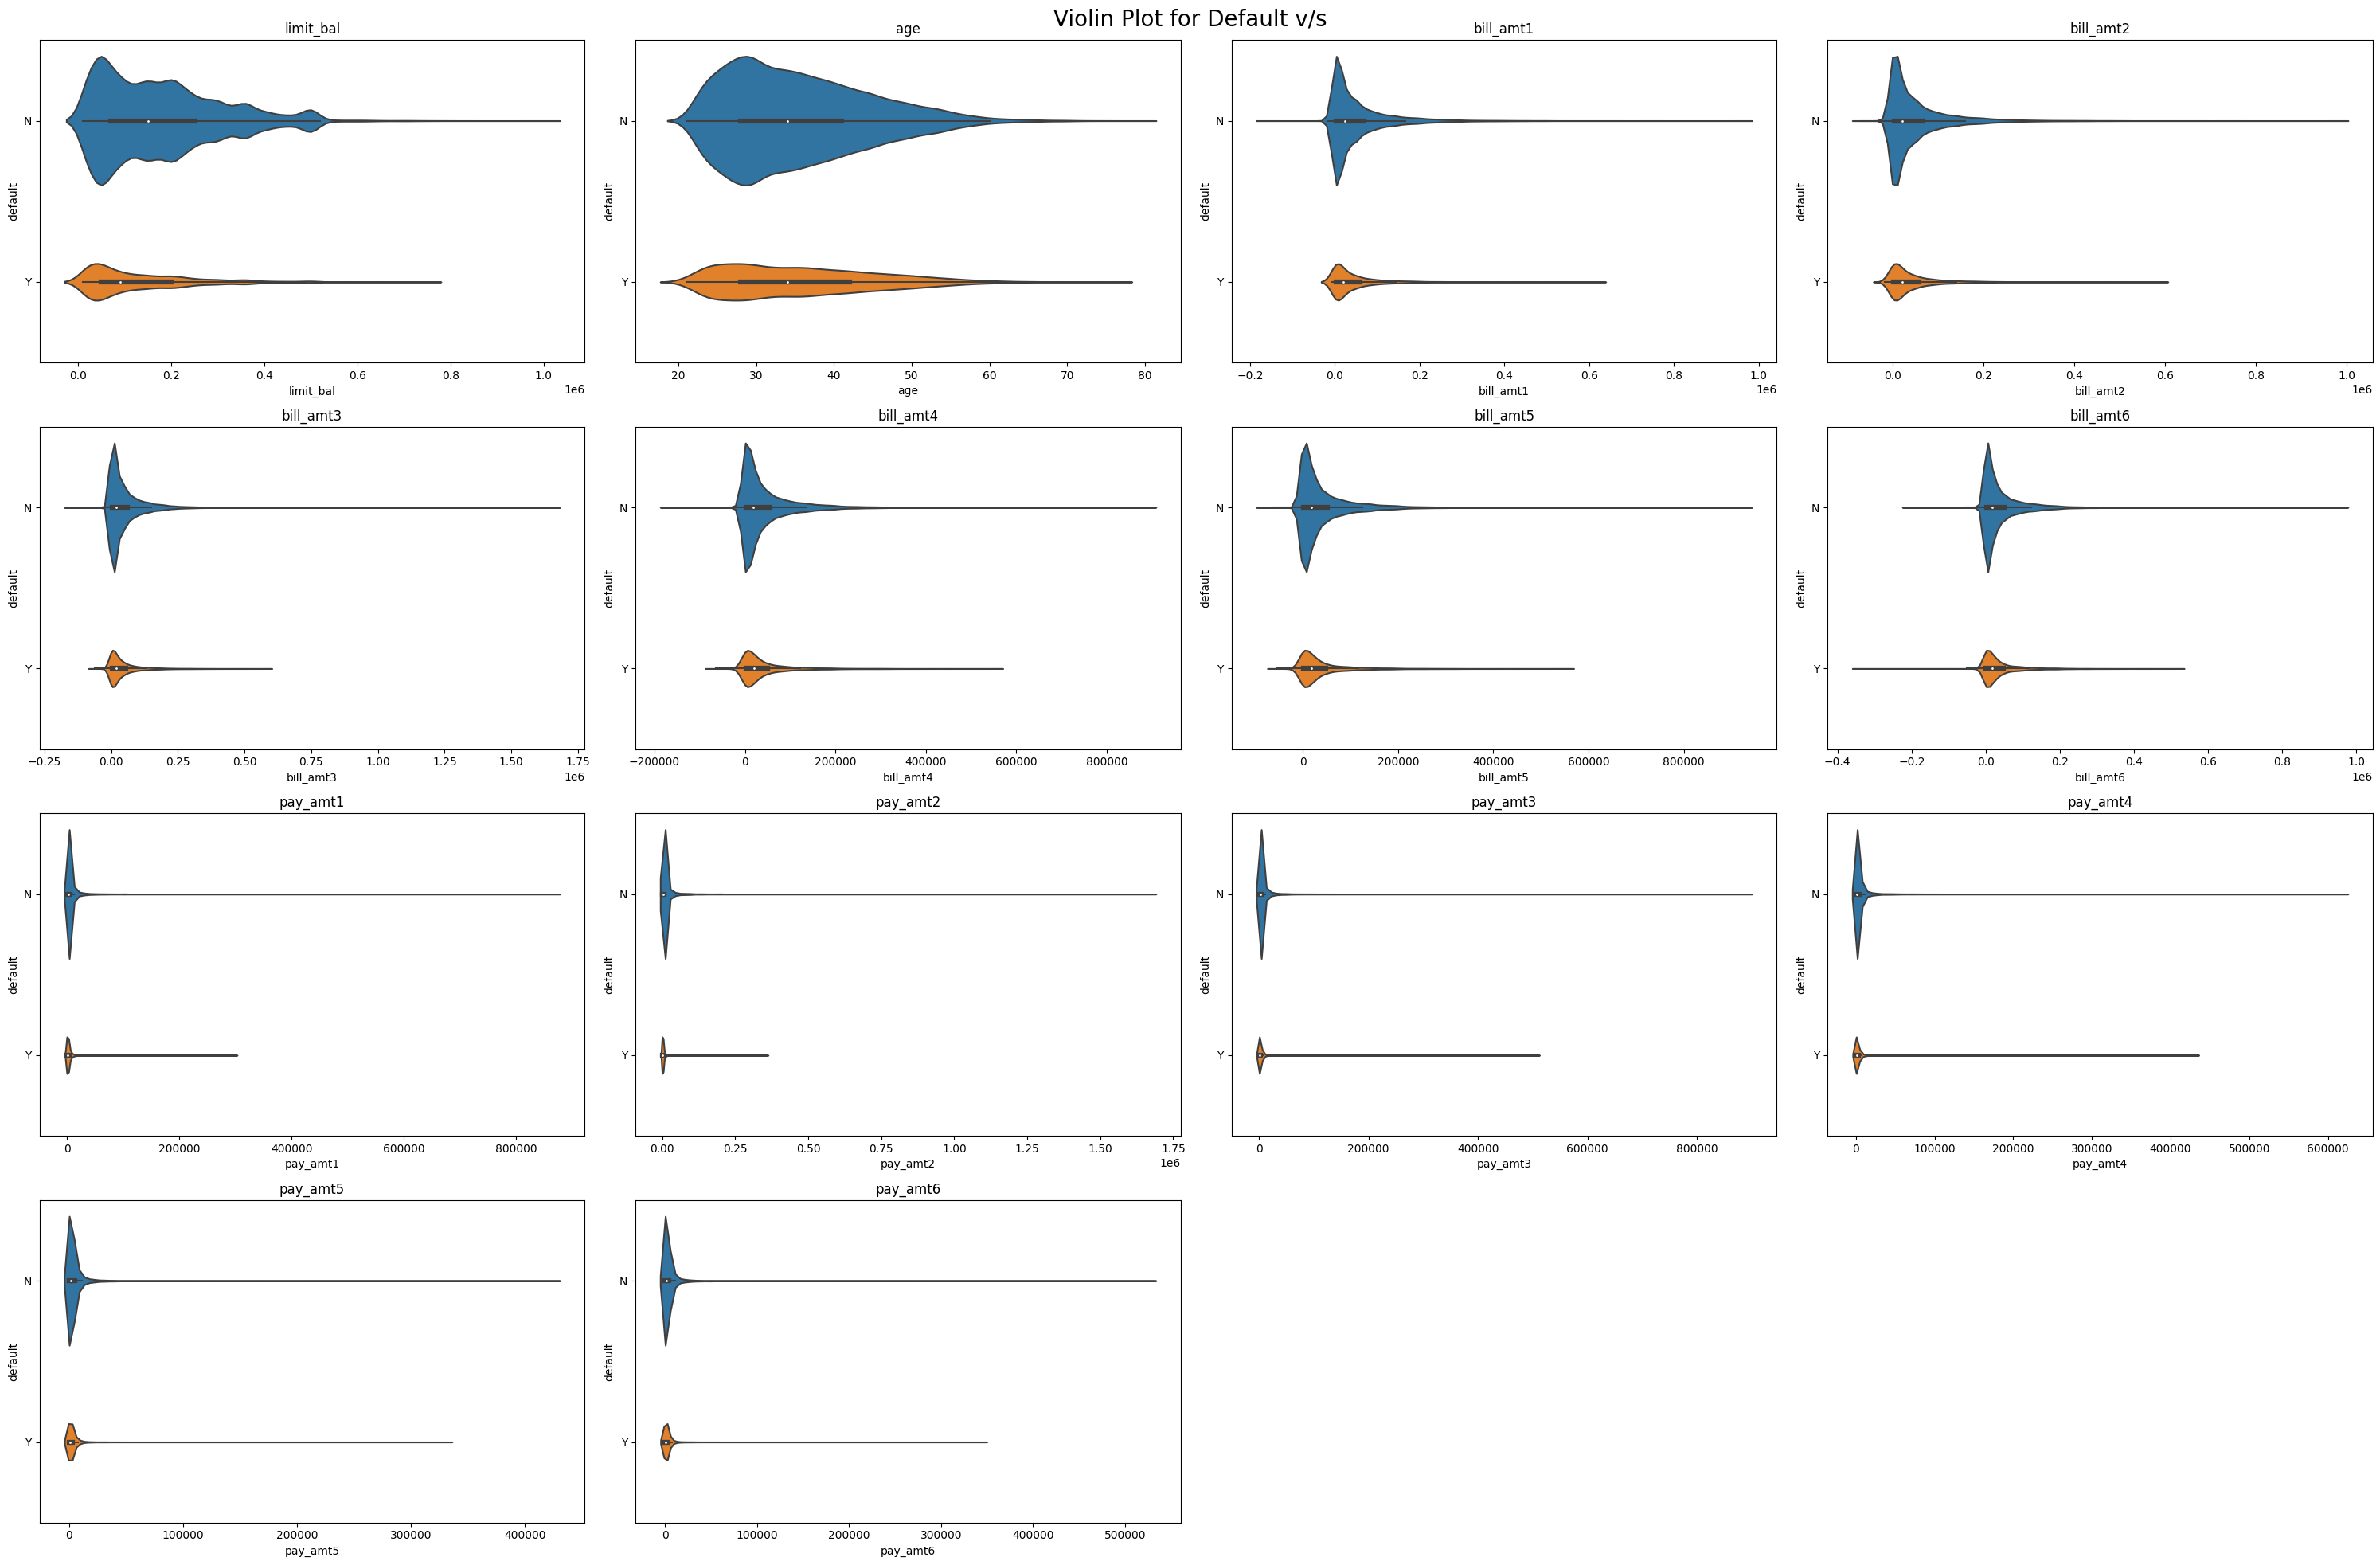

In [27]:
# Chart - 7 visualization code

fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

# Generating violin plots for each numerical column with respect to the target variable "default"
for i, col in enumerate(numerical_cols):
    sns.violinplot(
        data= df, 
        x= col, y= "default", scale= "count",
        ax= axes[i]
    )
    axes[i].set_title(col)
    
# Removing extra subplots
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

#aesthetics
plt.suptitle("Violin Plot for Default v/s", fontsize= 20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Violin plots are useful for visualizing the distribution of numerical data while providing insights into the data's probability density. They are particularly effective for comparing the distributions between different categories or groups, in this case, the 'default' variable.

##### 2. What is/are the insight(s) found from the chart?

1. The violin plots for most numerical columns, except for 'limit_bal' and 'age,' reveal that the majority of values are centered around the median for both the "Y" (default) and "N" (non-default) classes. This suggests that these numerical features might not be strong differentiators between the default and non-default categories.  
2. For 'limit_bal' and 'age,' the distribution of values appears to be more uniformly scattered for both the "Y" and "N" classes of the 'default' variable. This indicates that 'limit_bal' and 'age' could potentially be significant factors in distinguishing between customers who default and those who do not.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution patterns of numerical features with respect to the 'default' variable can provide valuable insights into the factors that influence credit card defaults. This information can be utilized to develop more accurate risk assessment models that can effectively identify customers at a higher risk of default, thereby enabling proactive measures to mitigate potential losses.  
The observation that 'limit_bal' and 'age' exhibit more scattered distributions for both classes of the 'default' variable suggests that these variables could be critical indicators in assessing credit risk and predicting potential defaults. Utilizing these features effectively in risk assessment models can lead to more accurate predictions and better risk management strategies.  
Regarding potential negative impacts, the lack of significant differentiation in the distribution of some numerical features between default and non-default categories could potentially limit the predictive power of the model. It's crucial to explore additional features or conduct further analysis to identify other variables that might better differentiate between customers who default and those who do not, thereby improving the model's predictive accuracy and effectiveness.

#### Chart - 8
Generating KDE Plots for Comparison between Numerical Columns and Target Variable


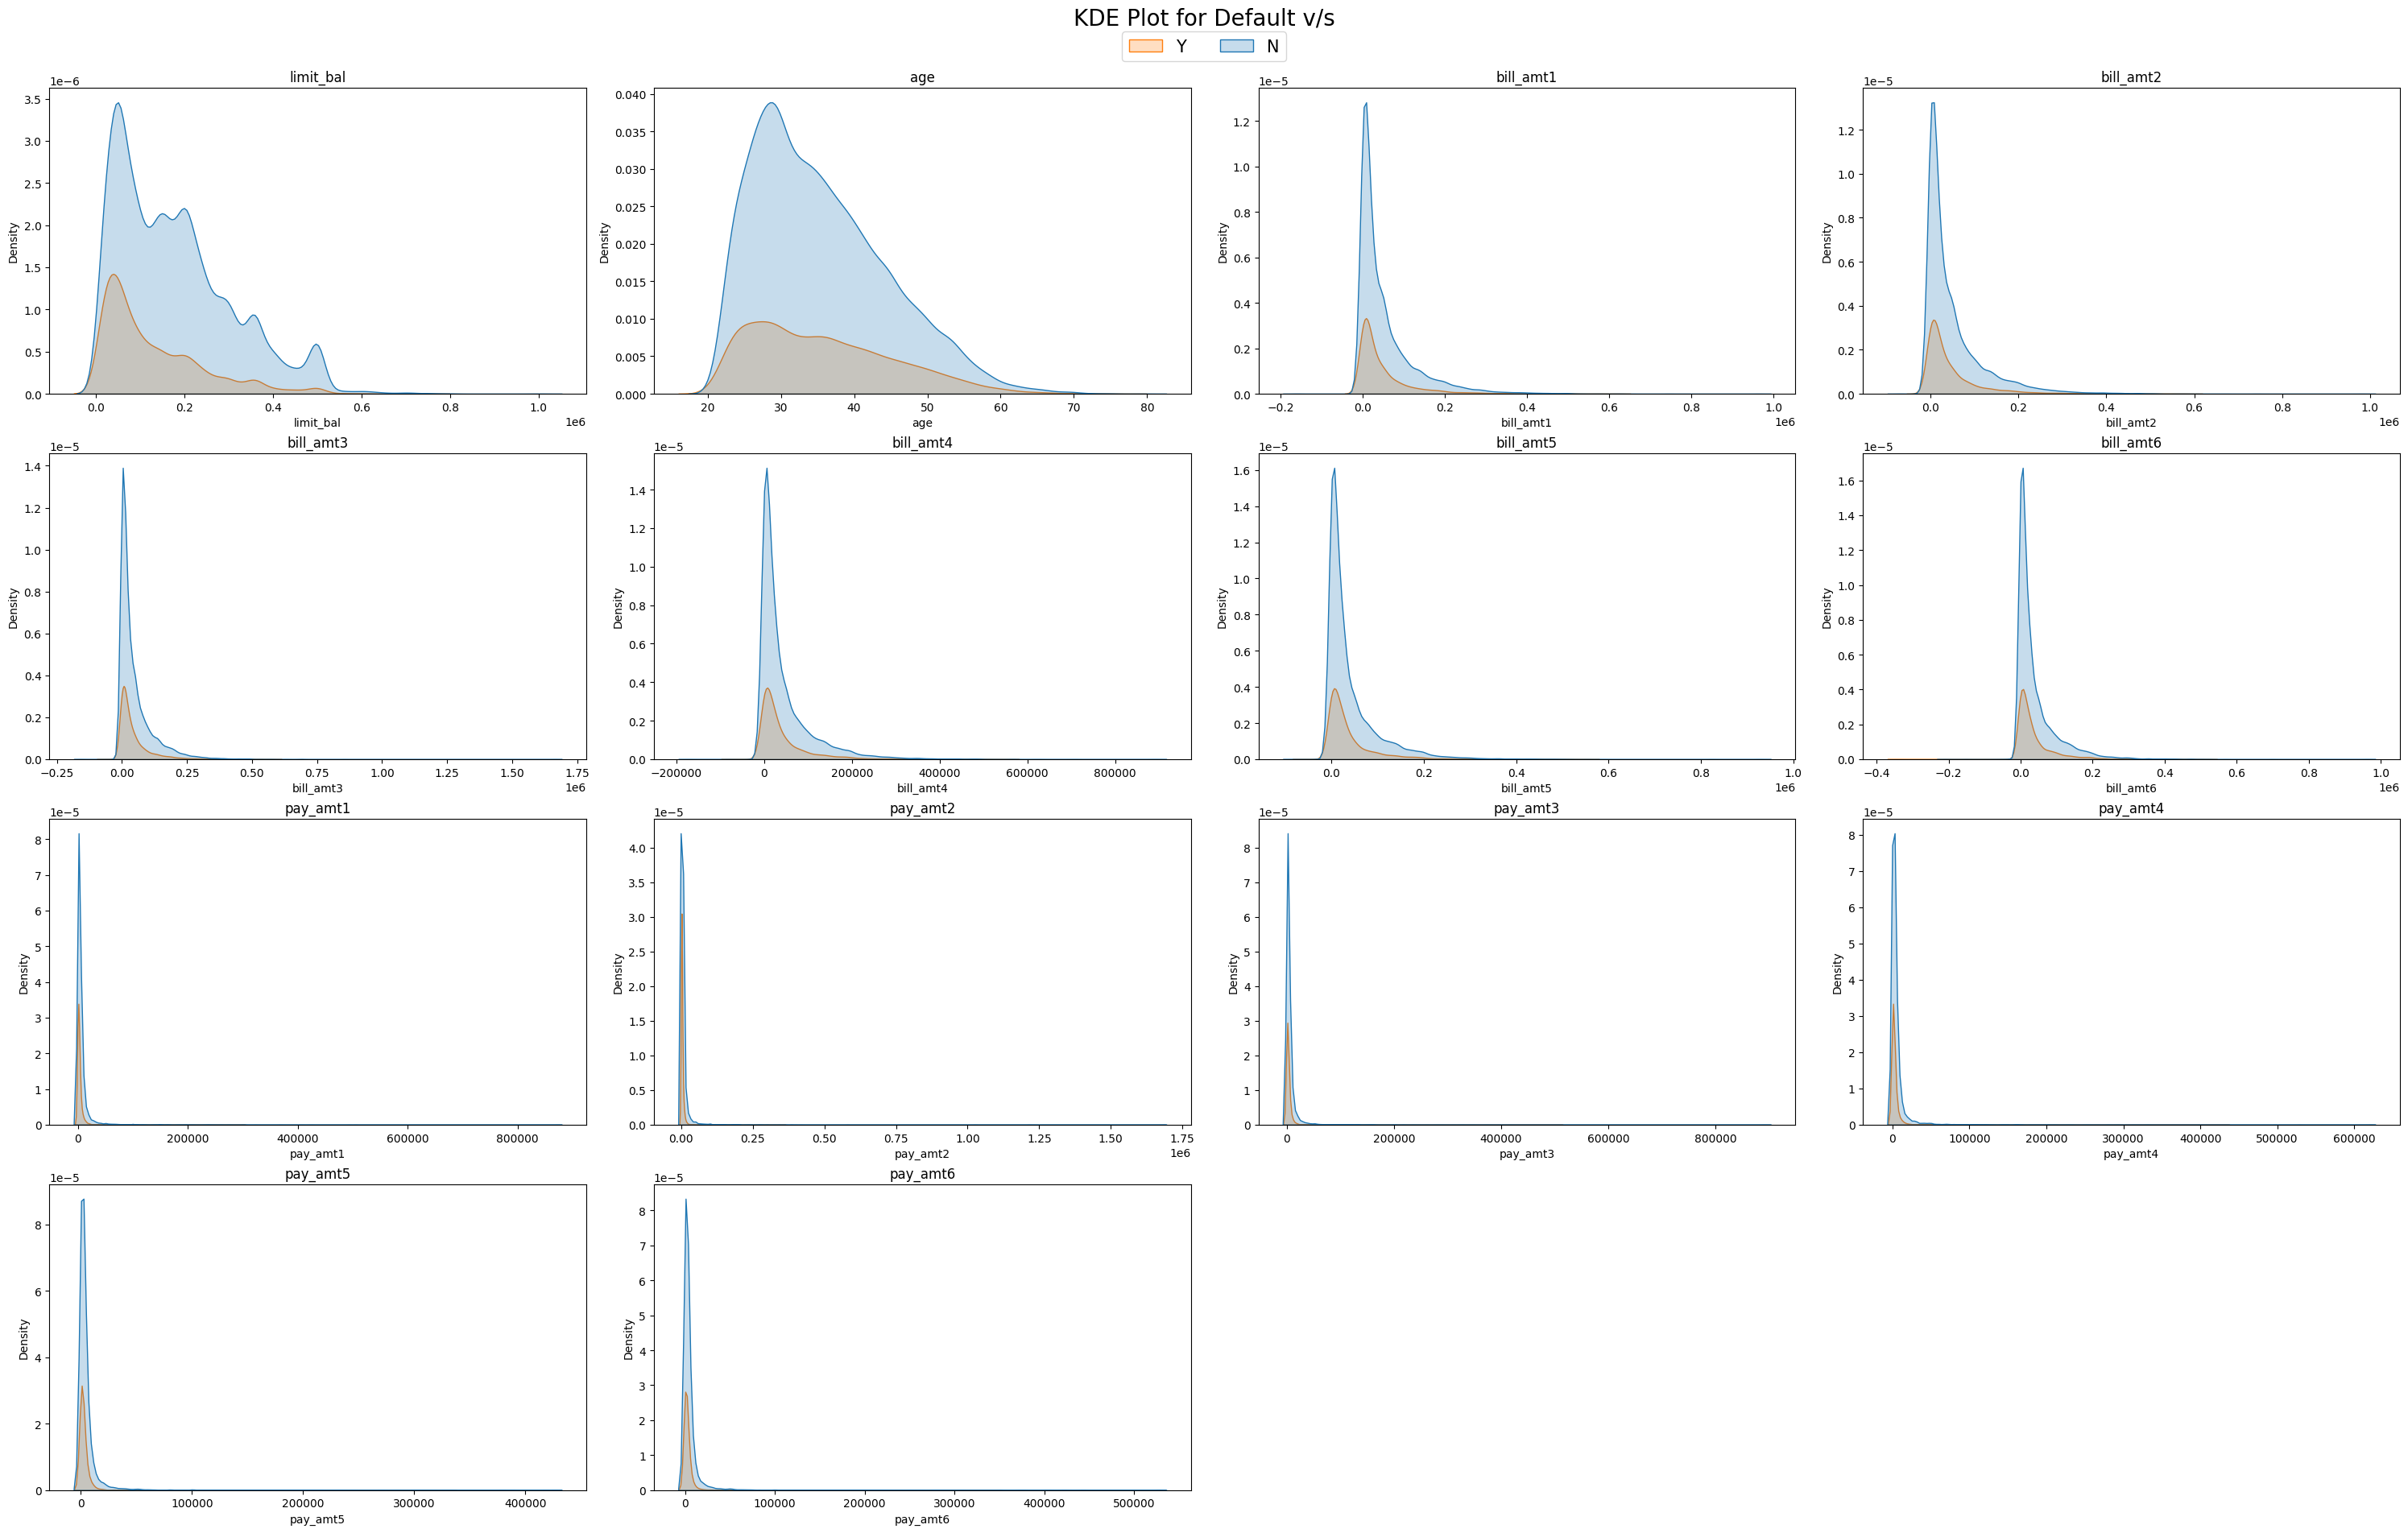

In [28]:
# Chart - 8 visualization code

fig, axes= plt.subplots(4, 4, figsize= (30, 20))
axes= axes.flatten()

# Generating KDE plots for each numerical column with respect to the categorical variable "default"
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data= df, x= col, hue= "default",
                fill= True, ax= axes[i])
    axes[i].set_title(col)
    axes[i].legend_.remove()

# Removing extra subplots
for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

#aesthetics
plt.tight_layout()
plt.subplots_adjust(top=0.90)
fig.suptitle("KDE Plot for Default v/s", fontsize= 20, y=0.95)
fig.legend(labels=df['default'].unique(), loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.94), fontsize= 15)


plt.show()

##### 1. Why did you pick the specific chart?

KDE (Kernel Density Estimation) plots are effective for visualizing the probability density function of a continuous variable and can provide insights into the distribution of the data across different categories, in this case, the "default" variable.

##### 2. What is/are the insight(s) found from the chart?

1. The KDE plots for both 'default' classes, "Y" and "N," appear to have similar distributions for most of the numerical columns. However, the KDE plot for "Y" is smaller in size compared to the KDE plot for "N," suggesting that the density of data points for the default class ("Y") is relatively lower than that for the non-default class ("N").  
2. The similarity in the KDE plots indicates that the distribution of numerical features might not significantly differ between the default and non-default categories, suggesting that these features, indivdually, might not be strong differentiators for predicting credit card defaults.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the distribution patterns of numerical features in relation to the 'default' variable can provide insights into the factors that contribute to credit card defaults. This information can be utilized to refine risk assessment models and develop targeted strategies for managing credit risks effectively.  
While the KDE plots show similarities in the distribution patterns between the default and non-default categories, it is essential to explore additional features or conduct further analysis to identify potential differentiating factors that can improve the predictive power of the model and enhance the accuracy of credit card default predictions.  
Regarding potential negative impacts, the relatively smaller size of the KDE plot for the default class ("Y") could suggest a lower density of data points in the dataset for customers who default. This could potentially limit the model's predictive ability to accurately identify customers at risk of default. It's crucial to explore additional features and conduct in-depth analyses to identify potential factors that can better differentiate between customers who default and those who do not.

#### Chart - 9
Distribution of Default/No Default among classes of Categorical Features

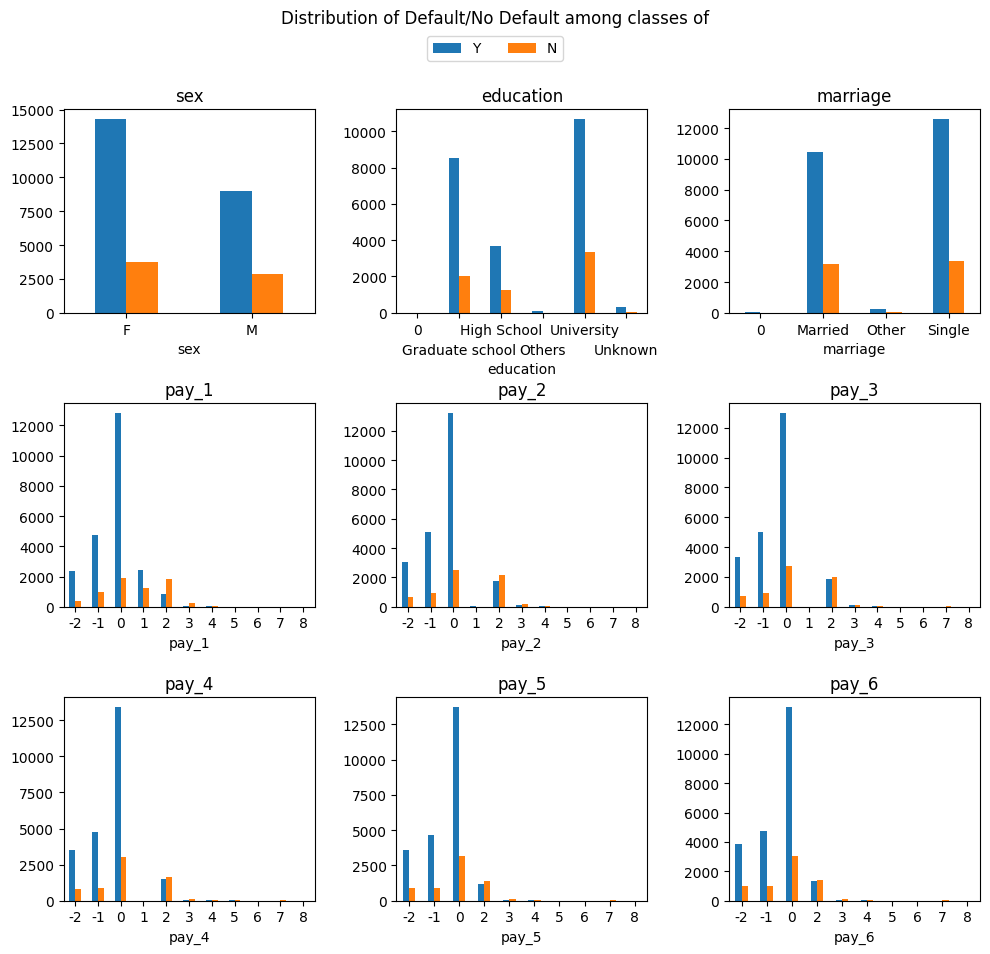

In [29]:
fig, axes= plt.subplots(3, 3, figsize= (10, 10))
axes= axes.flatten()

for i, feature in enumerate(categorical_cols[:-1]):
    pd.crosstab(index= df[feature], columns= df["default"]).plot(kind= "bar", ax= axes[i])
    # Adjusting the x-axis tick labels for "education"
    if feature == "education":    
        x_labels = axes[i].get_xticklabels()
        indices = np.arange(0, len(x_labels))
        for tick in indices[1::2]:
            x_labels[tick].set_y(-0.1)
        axes[i].set_xticks(indices)
        axes[i].set_xticklabels(x_labels, rotation=0)
    # Adjusting the x-axis tick labels for other features
    else:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
        
    axes[i].set_title(feature)
    axes[i].legend_.remove()

plt.tight_layout()
plt.subplots_adjust(top=0.85)
fig.suptitle("Distribution of Default/No Default among classes of", y=0.95)
fig.legend(labels=df['default'].unique(), loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.93))

plt.show()

##### 1. Why did you pick the specific chart?
Cross-tabulated bar charts are suitable for visualizing the distribution of categorical variables with respect to the target variable ('default' in this case). They can help in understanding how different categories within each feature contribute to the occurrence of the target outcome.

##### 2. What is/are the insight(s) found from the chart?
For the 'sex' variable, the number of defaults appears to be higher for females compared to males, indicating a potential gender-based difference in default rates.  
The 'education' variable shows that clients with a university education have a higher number of defaults compared to other education categories, suggesting a potential correlation between education level and default rates.  
In the 'marriage' variable, the highest number of defaults is observed in the 'single' category, followed by the 'married' category, indicating a potential association between marital status and default rates.  
Across the 'pay_' variables, the default rates vary for different payment statuses, with some statuses showing a notably higher number of defaults, indicating the impact of payment behavior on default rates.  

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.  

Understanding the distribution of default rates across different categories within each feature can provide valuable insights for developing targeted strategies to manage credit risks effectively.  
The identification of potential correlations between demographic or payment-related factors and default rates can help in the development of more accurate risk assessment models, leading to improved risk management and better-informed decision-making processes.  
The insights gained from the cross-tabulated bar charts can guide the design of tailored financial products or services that cater to specific customer segments, leading to improved customer satisfaction and reduced credit risks.  
Regarding potential negative impacts, the presence of higher default rates in certain categories could suggest potential risk factors that might require additional attention and proactive management strategies. It's essential to continually monitor these factors and implement appropriate measures to minimize potential risks and losses.

### Multivariate Analysis

#### Chart - 10
Generating a Heatmap for the Correlation Matrix of Numerical Columns

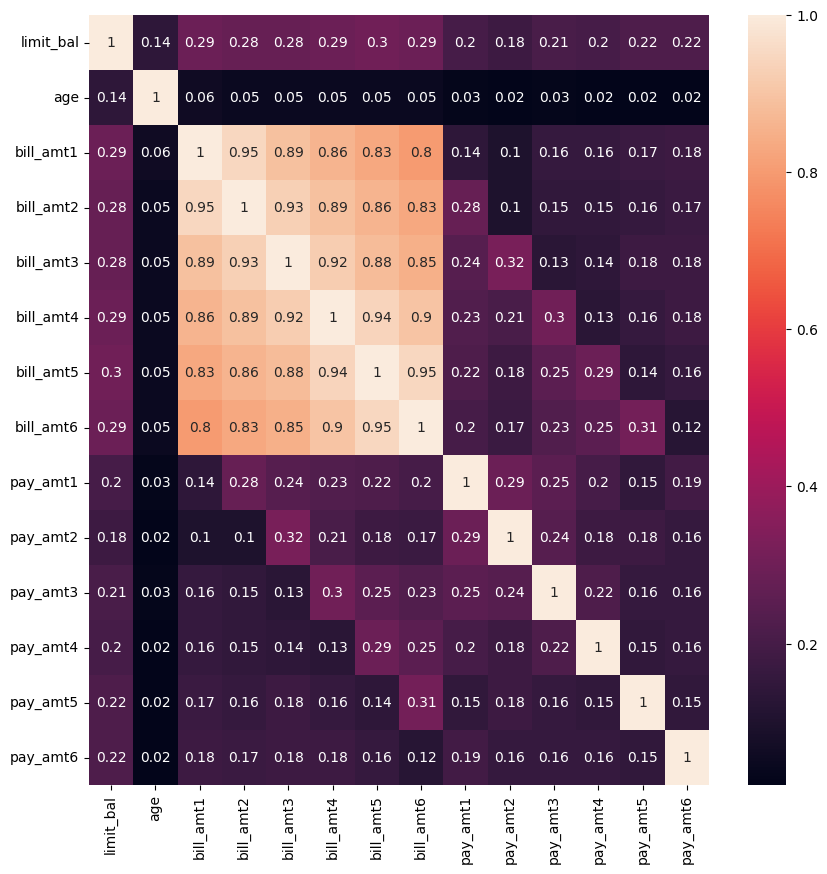

In [30]:
# Chart - 10 visualization code

fig= plt.figure(figsize= (10, 10))
#heatmap for the correlation matrix of numerical columns
sns.heatmap(df[numerical_cols].corr().round(2), annot= True)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are effective for visualizing the correlation matrix of numerical data, allowing for a quick and easy understanding of the relationships between different numerical variables.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap indicates a high correlation coefficient (greater than 0.80) between all 'bill_amt' variables. This suggests a strong linear relationship between these variables, indicating that changes in one variable are closely associated with changes in the others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the high correlation between 'bill_amt' variables can help in identifying potential multicollinearity issues, which may affect the accuracy and reliability of the predictive models.  
Multicollinearity can lead to inflated standard errors, making some variables statistically insignificant when they might be significant in reality. It can also make the model less interpretable and affect the stability of the model's predictions.  
To address this issue, it's essential to apply techniques such as feature selection or transformation to mitigate the effects of multicollinearity and improve the accuracy and robustness of the credit card default prediction model.  

#### Chart - 11
Generating a Pair Plot

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/1382200143.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


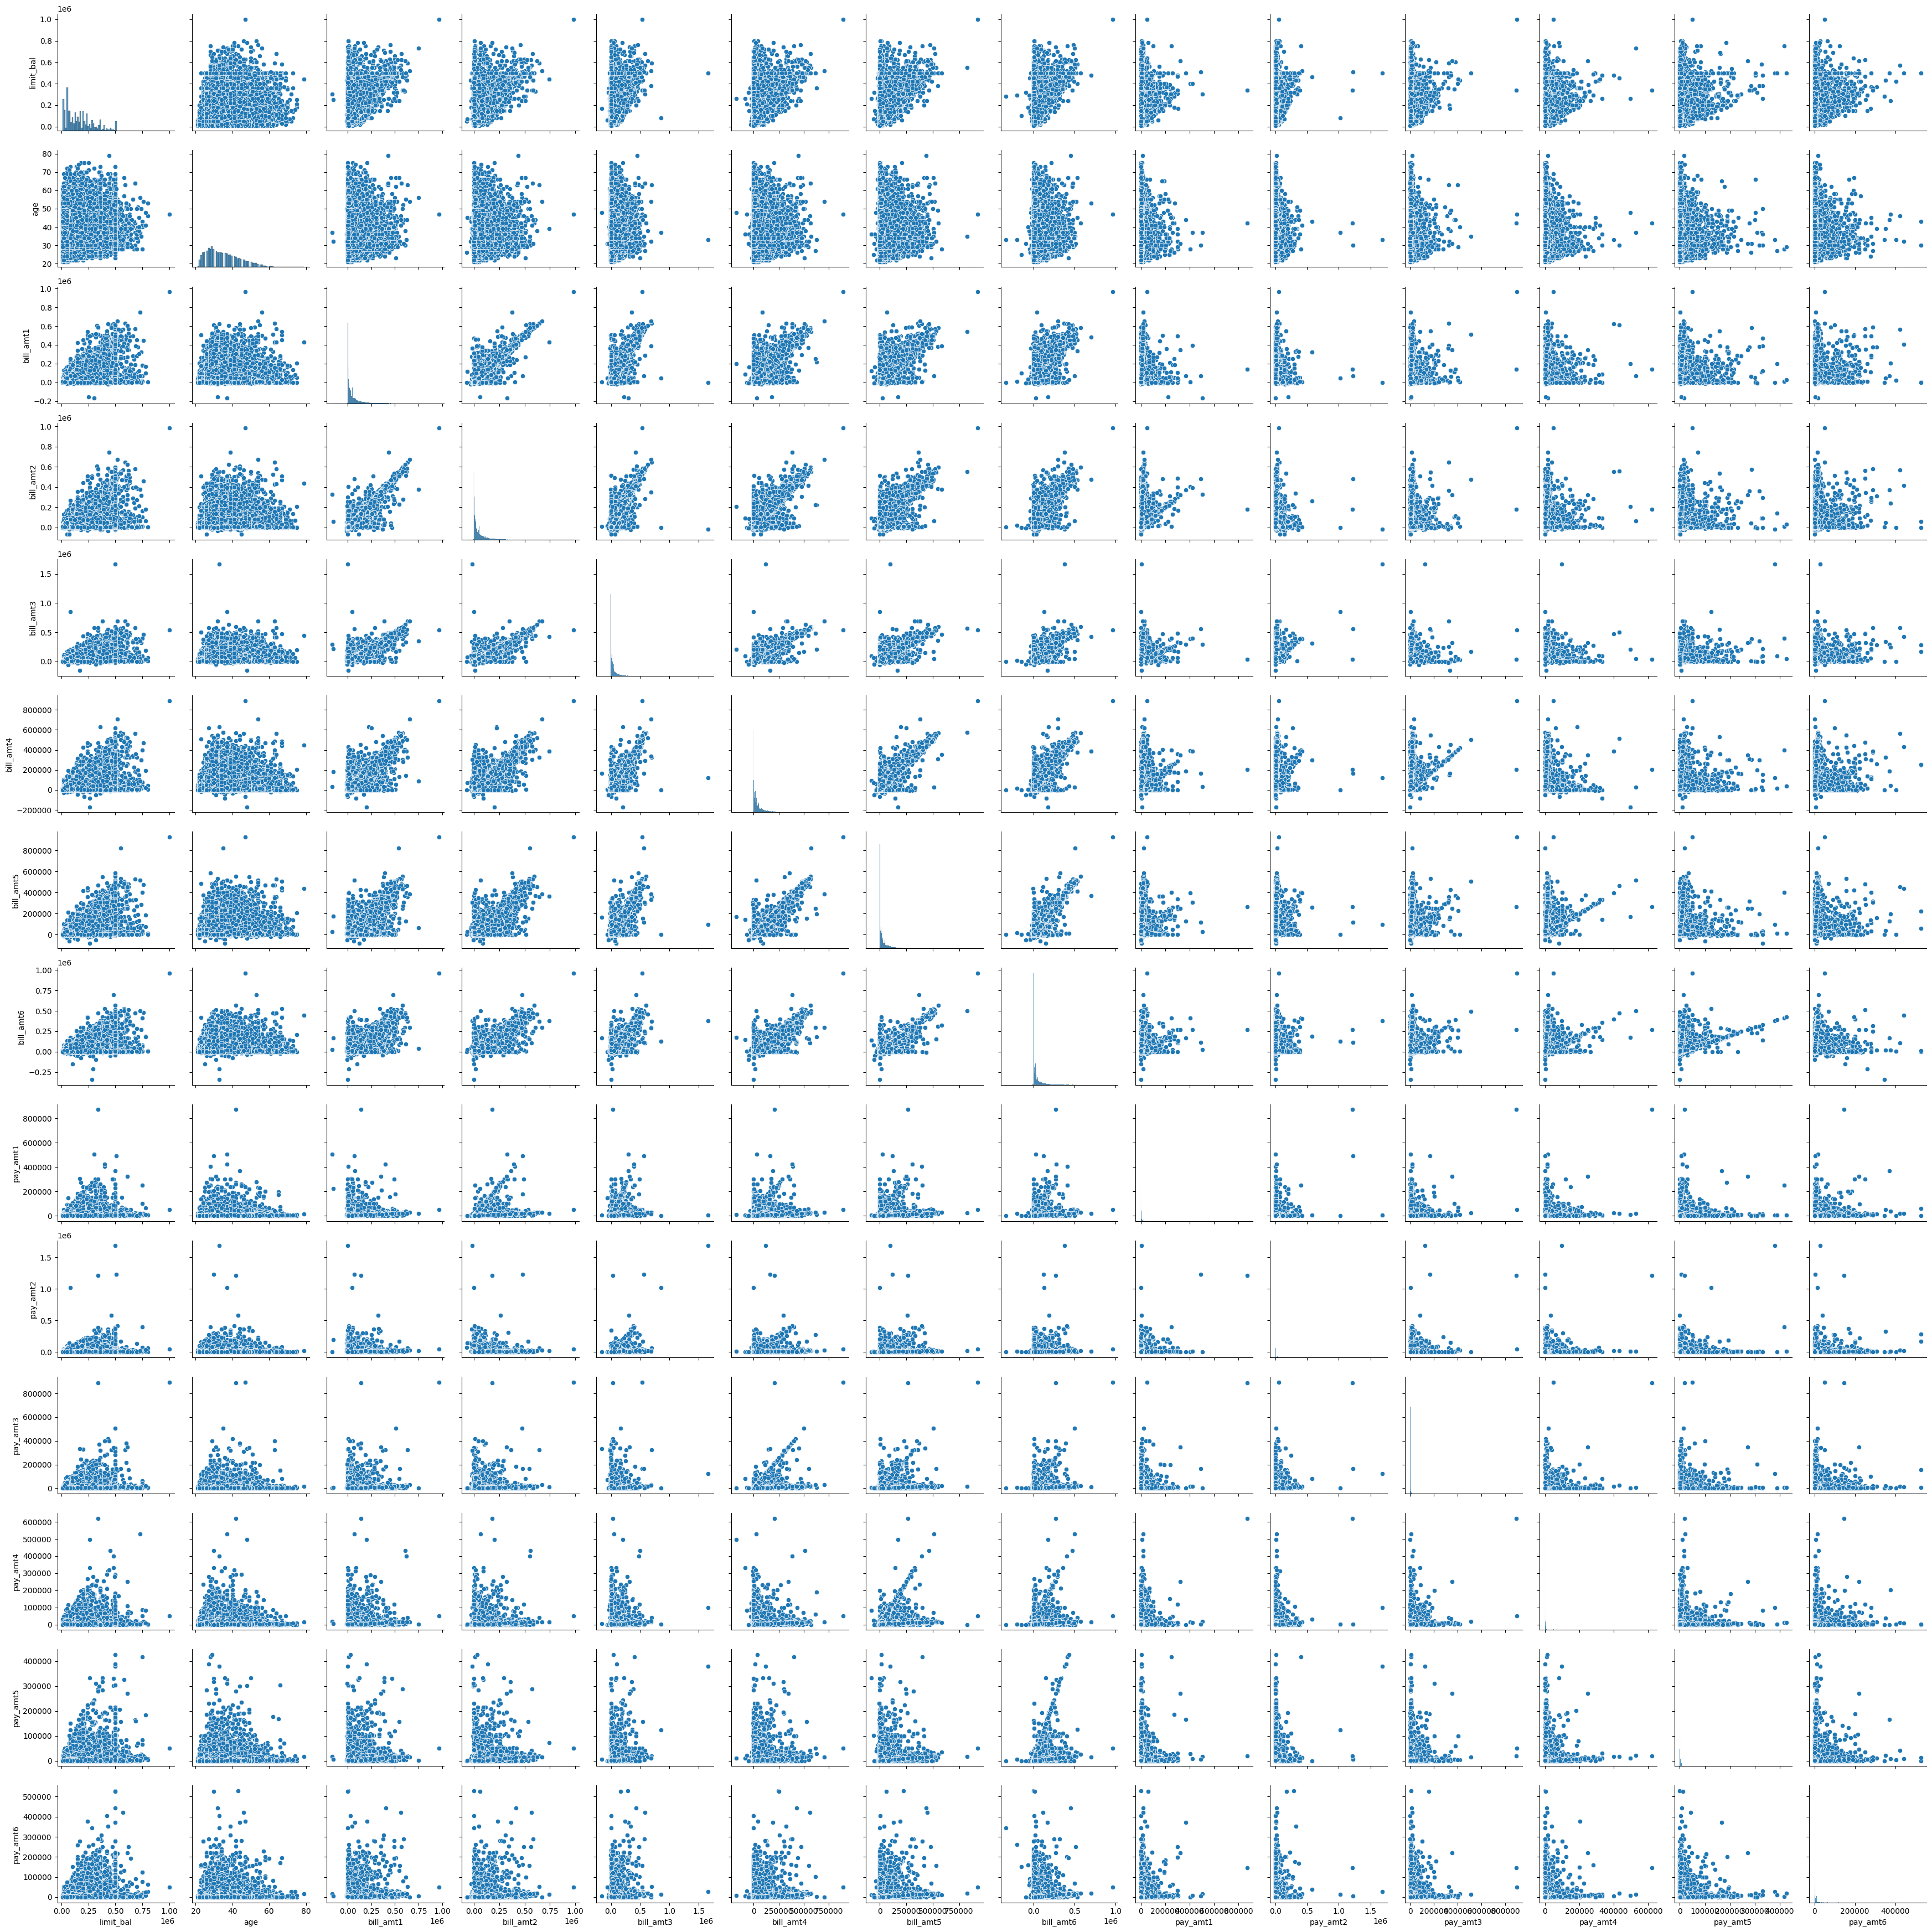

In [11]:
# Generating the pair plot for the DataFrame
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplot allows for the simultaneous display of scatter plots for joint relationships, as well as histograms for each variable. This facilitates a comprehensive overview of the data distribution and potential correlations or patterns between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [32]:
df_num = df[numerical_cols]

In [50]:
# Calculate VIF for each feature
def calc_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values("VIF", ascending= False).reset_index(drop= True)

In [51]:
def iterative_vif_calculator(X):
    x= X.copy()
    while True:
        vif_data= calc_vif(x)
        if vif_data.loc[0, "VIF"]>10:
            x= x.drop(columns= [vif_data.loc[0, "Variable"]])
        else:
            break
    return vif_data

In [53]:
vif_data

Variable  VIF_initial  VIF_final
0   bill_amt2    38.058475   0.000000
1   bill_amt5    35.826832   0.000000
2   bill_amt3    31.712544   0.000000
3   bill_amt4    29.403038   0.000000
4   bill_amt6    21.286035   4.741244
5   bill_amt1    20.647043   4.487743
6   limit_bal     3.215332   3.204357
7         age     2.740839   2.739018
8    pay_amt2     2.369563   1.247377
9    pay_amt1     1.889066   1.323208
10   pay_amt3     1.887768   1.283482
11   pay_amt5     1.844597   1.303358
12   pay_amt4     1.784030   1.259048
13   pay_amt6     1.269660   1.234618

In [55]:
vif_data= (
    pd
    .merge(
        calc_vif(df_num), iterative_vif_calculator(df_num), 
        how= "outer", on= "Variable")
    .fillna(0)
    .rename(columns= {"VIF_x": "VIF_initial", "VIF_y": "VIF_final"})
)

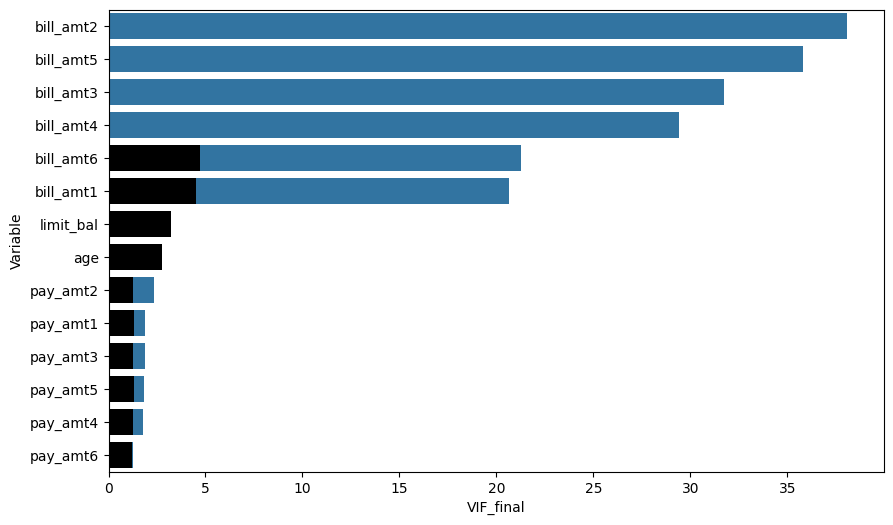

In [56]:
# Visualize VIF values
fig= plt.figure(figsize=(10, 6))
sns.barplot(data= vif_data, y= "Variable", x= "VIF_initial", color= "#1f77b4",)
sns.barplot(data= vif_data, y= "Variable", x= "VIF_final", color= "black")
# plt.suptitle("VIF Values for Numerical Features")
# plt.xlabel("Variables")
# plt.ylabel("VIF")
plt.show()

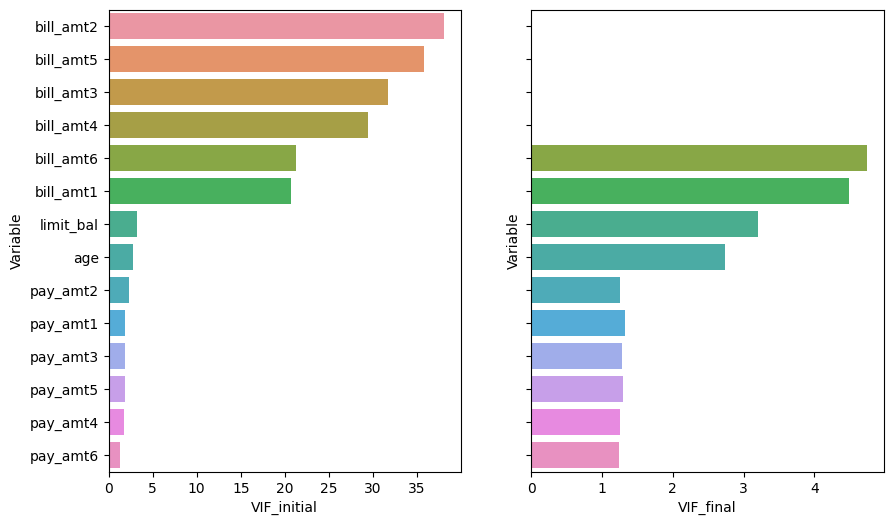

In [55]:
# Visualize VIF values
fig, axes= plt.subplots(1, 2, figsize=(10, 6), sharey= True)
sns.barplot(data= vif_data, y= "Variable", x= "VIF_initial", color= "#1f77b4", ax= axes[0])
sns.barplot(data= vif_data, y= "Variable", x= "VIF_final", color= "#1f77b4", ax= axes[1])
# plt.suptitle("VIF Values for Numerical Features")
# plt.xlabel("Variables")
# plt.ylabel("VIF")
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Credit Limit has an effect on Default Rate<br>
2. Gender of the loan applicant has an impact on Default Rate<br>
3. Age of the loan applicant has an impact on Default Probability<br>

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant relationship between the credit limit and the likelihood of default.<br>
H1: Higher credit limits are associated with a lower default rate.<br>

#### 2. Perform an appropriate statistical test.

In [1]:
# Split the data into two groups based on default status
defaulted = df.query("default== 'Y'")
not_defaulted = df.query("default== 'N'")

# Perform the t-test
t_stat, p_value = stats.ttest_ind(defaulted['limit_bal'], not_defaulted['limit_bal'])

# Check the p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship b/w credit limit and likelihood of default.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship credit limit and likelihood of default.")

Reject the null hypothesis. There is a significant relationship.


##### Which statistical test have you done to obtain P-Value?

Two-Sample t-test

##### Why did you choose the specific statistical test?

The two-sample t-test is appropriate for comparing the means of two independent groups, in this case, the group of clients who defaulted and the group of clients who did not default.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant association between gender and the probability of defaulting.<br>
H1: The default rate differs significantly between male and female clients.

#### 2. Perform an appropriate statistical test.

In [1]:
# Perform Statistical Test to obtain P-Value
contingency_table = pd.crosstab(df['sex'], df['default'])

chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant association between gender and default rate.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between gender and default rate.")

Reject the null hypothesis. There is a significant association between gender and default rate.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Chi-Square Test of Independence is specifically designed to assess the independence of two categorical variables, making it suitable for analyzing the association between gender (a categorical variable) and the probability of defaulting (another categorical variable) in the dataset.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no significant relationship between the age of the client and the probability of defaulting.<br>
H1: Different age groups have varying default rates.

#### 2. Perform an appropriate statistical test.

In [2]:
# Perform Statistical Test to obtain P-Value

age_data = df['age']
default_data = df['default'].map({"Y": 1, "N": 0})

# Perform the point-biserial correlation test
corr_coeff, p_value = stats.pointbiserialr(default_data, age_data)

# Check the p-value
if p_value < 0.05:  # You can choose a different significance level
    print("Reject the null hypothesis. There is a significant relationship between age and default probability.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between age and default probability.")

Reject the null hypothesis. There is a significant relationship between age and default probability.


##### Which statistical test have you done to obtain P-Value?

Point-Biserial Correlation Coefficient Test

##### Why did you choose the specific statistical test?

The point-biserial correlation test is specifically designed to assess the relationship between a binary variable and a continuous variable. In this case, it is used to determine whether there is a significant relationship between the age of the clients and their probability of defaulting. By using this test, we can evaluate the strength and significance of the association between age and the likelihood of default in the dataset.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
#spliting the dataset in dependent and target variable

X= df_model.drop(columns= ["default"])
y= df_model["default"]

### 2. Handling Outliers & Scaling Numerical Columns

In [ ]:
def outlier_treatment(col):
    '''
    iqr based outlier treatment
    '''
    
    q1= np.percentile(col, 25, axis= 0)
    q3= np.percentile(col, 75, axis= 0)

    iqr= q3- q1
    
    lower_bound= q1- 1.5*iqr
    upper_bound=  q3+ 1.5*iqr
    
    return np.select(
        (col< lower_bound, col> upper_bound),
        (lower_bound, upper_bound),
        col
    )

In [ ]:
num_cols_index= [i for i, feature in enumerate(X.columns) if feature in numerical_cols]
num_cols_index

In [ ]:
# with_centering= False, with_scaling= False, quantile_range= (0.5, 0.95), unit_variance= True
num_cols_preprocessing= Pipeline([
    (
        "scaling", 
        PowerTransformer()
    ),
    (
        "outlier treatment",
        FunctionTransformer(outlier_treatment)
    ),
])

In [ ]:
X_num_scaled= num_cols_preprocessing.fit_transform(X[numerical_cols])
X_num_scaled_df= pd.DataFrame(X_num_scaled, columns= numerical_cols)

In [ ]:
fig, axes= plt.subplots(4, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.boxplot(data= X_num_scaled_df, x= feature, ax= axes[i])
    axes[i].set_title(feature)

for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
fig, axes= plt.subplots(4, 4, figsize= (20, 20))
axes= axes.flatten()

for i, feature in enumerate(numerical_cols):
    stats.probplot(X_num_scaled_df[feature], plot= axes[i])
    axes[i].set_title(feature)

for i in range(len(numerical_cols), 16):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

For Outlier Treatment, i've used the IQR method. The reason for using the IQR method is its robustness in handling skewed distributions and its ability to effectively identify and remove extreme values that can skew the analysis or modeling results.

##### Which method have you used to scale you data and why?

For Scaling the numerical colums, i used PowerTransformer, because it is effective in handling skewed data distributions by applying power transformations that can make the data distribution more symmetrical. It also helps in reducing the impact of outliers and makes the data more suitable for models that assume normally distributed data.

### 3. Categorical Encoding

In [ ]:
cat_sex_encoder= OneHotEncoder(
    drop= "first"
    )

cat_education_pipeline= Pipeline([
    (
        "imputing 'Unknown'",
        SimpleImputer(
            missing_values= "Unknown",
            strategy= "most_frequent"
        )
    ),
    (
        "Ordinal Encoding",
        OrdinalEncoder(
            categories= [["0", "Others", "High School", 
                         "Graduate school", "University"]]
        )
    )
])

cat_marriage_pipeline= Pipeline([
    (
        "imputing '0'",
        SimpleImputer(
            missing_values= "0",
            strategy= "most_frequent"
        )
    ),
    (
        "One Hot Encoding",
        OneHotEncoder(
            drop= "first"
        )
    )
])

cat_pay_encoder= OrdinalEncoder(
    categories= [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]*6
    )


In [ ]:
cat_cols_preprocessing= ColumnTransformer([
    (
        "One Hot Encoding column 'sex'",
        cat_sex_encoder,
        [1]
    ),
    (
        "imputing 'Unknown' with mode and Ordinal Encoding column 'education'",
        cat_education_pipeline,
        [2]
    ),
    (
        "imputing '0' with mode and One Hot Encoding column 'marriage'",
        cat_marriage_pipeline,
        [3]
    ),
    (
        "Ordinal Encoding 'pay_' columns",
        cat_pay_encoder,
        slice(5, 11)
    )
])

In [ ]:
X_cat_processed= cat_cols_preprocessing.fit_transform(X, y)
X_cat_processed_df= pd.DataFrame(X_cat_processed, columns= ["sex", "education", "other", "single", "pay_1", "pay_2", "pay_3", "pay_4", "pay_5", "pay_6"])

fig, axes= plt.subplots(4, 3, figsize= (30, 30))
axes= axes.flatten()

for i, feature in enumerate(X_cat_processed_df.columns):
    sns.countplot(data= X_cat_processed_df, x= feature, color= "#1f77b4", ax= axes[i])
    axes[i].set_title(feature)
    
for i in range(X_cat_processed_df.shape[1], 12):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

For the purpose of Categorical Encoding, i've employed 3 encoders- LabelEncoder for the target variable( "default"), OrdinalEncoder for feature "education" and OneHotEncoder for the rest.<br>
>LabelEncoder is a special kind of encoder designed specifically for target variables.<br>
>OrdinalEncoder is utilized when the categorical data has an inherent order or hierarchy. It assigns a numerical value to each category, preserving the ordinal relationship between categories. <br>
>OneHotEncoder is employed when the categorical data has no inherent order or hierarchy, and each category is independent of the others.<br>

### 4. Feature Engineering

In [ ]:
feature_engineering= ColumnTransformer([
    (
        "Processing Numerical Columns",
        num_cols_preprocessing,
        num_cols_index
    ),
    (
        "One Hot Encoding column 'sex'",
        cat_sex_encoder,
        [1]
    ),
    (
        "imputing 'Unknown' with mode and Ordinal Encoding column 'education'",
        cat_education_pipeline,
        [2]
    ),
    (
        "imputing '0' with mode and One Hot Encoding column 'marriage'",
        cat_marriage_pipeline,
        [3]
    ),
    (
        "Ordinal Encoding 'pay_' columns",
        cat_pay_encoder,
        slice(5, 11)
    )
])

### 7. Dimesionality Reduction

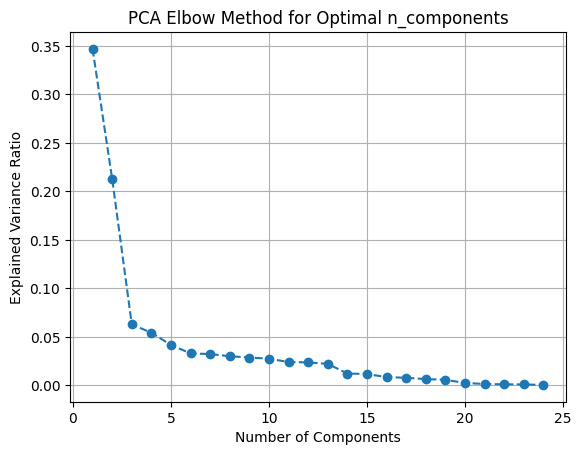

In [1]:
# Initializing PCA
fex= feature_engineering
fex.fit(X)
X_processed= fex.transform(X)
pca = PCA()
pca.fit(X_processed)

# Extracting the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Using the elbow method to find the optimal number of components
num_components = len(explained_variance)
plt.plot(range(1, num_components + 1), explained_variance, marker='o', linestyle='--')
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Elbow Method for Optimal n_components')
plt.show()

##### Do you think that dimensionality reduction is needed? Explain Why?

As of now, no dimensionality reduction technique has been implemented on the datasets. But we'll be employing PCA and RFE when building the pipelines. And if it produces any significant improvement in the model, we'll continue to use them.

### 8. Data Splitting

In [1]:
X_train, X_test, y_train, y_test= train_test_split(
    X, y, stratify= y, test_size= 0.30, random_state= 42
)

##### What data splitting ratio have you used and why? 

We've split the dataset into 70/30 train/test ratio because this ratio strikes a balance between having sufficient data for model training and having a reasonable amount of data for testing, while also leaving data for the purpose of validation. Also by allocating 70% of the data  for training, the model has access to a reasonably large training set, which can help reduce the risk of overfitting. While a 30% test set is often considered statistically significant, meaning that performance metrics (such as accuracy, precision, recall, etc.) estimated on this test set are likely to be representative of the model's performance on new, unseen data.

### 9. Data Transformation

In [15]:
#transforming features
fe= feature_engineering
fe.fit(X_train)
X_train_processed= fe.transform(X_train)
X_test_processed= fe.transform(X_test)

# transforming target variable
le= LabelEncoder()
le.fit(y_train)
y_train_processed= le.transform(y_train)
y_test_processed= le.transform(y_test)

### 9. Handling Imbalanced Dataset

In [5]:
#proportion of class "Y" instances in target variable
len(y[y=="Y"])/len(y)

0.22125813449023862

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced, as only 22% of all the instances are 'Y', while the rest are'N'

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Rather than using Oversampling or Undersampling to treat the imbalance in the dataset, we'll penalize the models as we build them. The main reason for that being preservation of data integrity as by using class weighting, we can maintain the original distribution of the dataset. This is important when the class imbalance reflects the true distribution of the target variable in the real-world scenario we're modeling.

## ***7. ML Model Implementation***

In [ ]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "MLP Classifier": MLPClassifier(max_iter= 1000),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
}

In [ ]:
stkfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

meta_data_00 = []
round_to= 4
def avg(x):
    return np.round(np.mean(x), round_to)
def std(x):
    return np.round(np.std(x), round_to)

for name, model in tqdm(models.items()):
    model_data= {}
    model_data["name"]= name
    model.random_state= 42
    
    scores= cross_validate(
        model, X_train_processed, y_train_processed,
        cv= stkfold, scoring= ["balanced_accuracy", "precision", "recall", "f1", "roc_auc"], 
        error_score= "raise"
    )
    
    balanced_accuracy= scores["test_balanced_accuracy"]
    precision= scores["test_precision"]
    recall= scores["test_recall"]
    f1= scores["test_f1"]
    roc_auc= scores["test_roc_auc"]
    
    model_data["average balanced accuracy"]= f"{avg(balanced_accuracy)} \u00B1 {std(balanced_accuracy)}"
    model_data["average precision"]= f"{avg(precision)} \u00B1 {std(precision)}"
    model_data["average recall"]= f"{avg(recall)} \u00B1 {std(recall)}"
    model_data["average f1"]= f"{avg(f1)} \u00B1 {std(f1)}"
    model_data["average roc auc"]= f"{avg(roc_auc)} \u00B1 {std(roc_auc)}"
    
    meta_data_00.append(model_data)

In [33]:
best_models_df= pd.DataFrame(meta_data_00).sort_values("average r", ascending= False).reset_index(drop= True)
best_models_df

name average balanced accuracy  \
0   Quadratic Discriminant Analysis           0.6845 ± 0.0088   
1              Gaussian Naive Bayes           0.6741 ± 0.0065   
2          Random Forest Classifier           0.6531 ± 0.0058   
3         Support Vector Classifier           0.6481 ± 0.0028   
4                AdaBoostClassifier            0.642 ± 0.0056   
5                               KNN           0.6379 ± 0.0063   
6                    MLP Classifier           0.6384 ± 0.0143   
7                Bagging Classifier           0.6335 ± 0.0076   
8          Decision Tree Classifier           0.6079 ± 0.0083   
9      Linear Discriminant Analysis           0.6146 ± 0.0053   
10              Logistic Regression           0.6035 ± 0.0063   
11            Bernoulli Naive Bayes           0.5587 ± 0.0091   
12                 Ridge Classifier           0.5743 ± 0.0052   

   average precision   average recall       average f1  average roc auc  
0    0.4305 ± 0.0081  0.5913 ± 0.0182  0.4982 ± 0.0112  0.7319 ± 0.0056  
1    0.4826 ± 0.0122  0.5011 ± 0.0144  0.4915 ± 0.0097  0.7427 ± 0.0062  
2    0.6425 ± 0.0191  0.3639 ± 0.0108  0.4645 ± 0.0114  0.7589 ± 0.0051  
3    0.6851 ± 0.0143  0.3409 ± 0.0074  0.4551 ± 0.0057  0.7159 ± 0.0053  
4     0.682 ± 0.0077  0.3273 ± 0.0116  0.4422 ± 0.0119   0.773 ± 0.0041  
5    0.5488 ± 0.0127  0.3601 ± 0.0153  0.4346 ± 0.0119  0.7076 ± 0.0094  
6    0.6114 ± 0.0252  0.3385 ± 0.0383  0.4339 ± 0.0292  0.7546 ± 0.0091  
7    0.6014 ± 0.0134  0.3289 ± 0.0169   0.425 ± 0.0157   0.7253 ± 0.009  
8    0.3783 ± 0.0096  0.4046 ± 0.0188   0.3909 ± 0.013  0.6079 ± 0.0086  
9      0.6709 ± 0.02  0.2665 ± 0.0108  0.3813 ± 0.0123  0.7434 ± 0.0056  
10   0.6708 ± 0.0206  0.2406 ± 0.0131   0.354 ± 0.0155  0.7468 ± 0.0042  
11   0.3258 ± 0.0194  0.2863 ± 0.0115  0.3046 ± 0.0132  0.6289 ± 0.0166  
12     0.6936 ± 0.03    0.17 ± 0.0107  0.2728 ± 0.0145  0.7434 ± 0.0056

In [36]:
print(f"for the purpose of this project, we'll use f1 as the metric for scoring our models.\n\tAccording to f1, the top three models are- \n\t\t{best_models_df.iloc[0, 0]}\n\t\t{best_models_df.iloc[1, 0]}\n\t\t{(best_models_df.iloc[2, 0])}")

for the purpose of this project, we'll use f1 as the metric for scoring our models.
	According to f1, the top three models are- 
		Quadratic Discriminant Analysis
		Gaussian Naive Bayes
		Random Forest Classifier


In [11]:
def crossval_scores(pipeline, round_to= 4):
    """
    Compute cross-validation scores for a given pipeline.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be evaluated.

    round_to : int, optional
        The number of decimal places to round the scores to. Defaults to 4.

    Returns:
    --------
    dict
    A dictionary containing the mean and standard deviation of accuracy, precision (macro), recall (macro), F1 score, and F1 score (macro) obtained from the cross-validation.
    """
    
    scores= cross_validate(
        pipeline, X_train, y_train_processed,
        cv= stkfold, 
        scoring= ["balanced_accuracy", "precision", "recall", "f1", "roc_auc"],
        n_jobs= -1, error_score= "raise"
    )

    balanced_accuracy= scores["test_balanced_accuracy"]
    precision= scores["test_precision"]
    recall= scores["test_recall"]
    f1= scores["test_f1"]
    roc_auc= scores["test_roc_auc"]
    
    return {
        "balanced_accuracy": f"{avg(balanced_accuracy)} \u00B1 {std(balanced_accuracy)}",
        "precision": f"{avg(precision)} \u00B1 {std(precision)}",
        "recall": f"{avg(recall)} \u00B1 {std(recall)}",
        "f1": f"{avg(f1)} \u00B1 {std(f1)}",
        "roc_auc": f"{avg(roc_auc)} \u00B1 {std(roc_auc)}",
    }

In [12]:
def model_analysis(model, name, round_to= 4):
    """
    Analyze the performance of the model using F1 score, AUC and Accuracy.

    Parameters:
    -----------
    model : object
        The trained model for analysis.

    name : str
        Name of the model for labeling purposes.

    round_to : int, optional
        Number of decimal places to round the scores. Defaults to 4.

    Returns:
    --------
    dict
        A dictionary containing the model's name, F1(macro) scores, AUC, and Accuracy for train and test datasets.

    """
    
    def balanced_accuracy(y, y_pred):
        return np.round(balanced_accuracy_score(y, y_pred), round_to)
    def precision(y, y_pred):
        return np.round(precision_score(y, y_pred), round_to)
    def recall(y, y_pred):
        return np.round(recall_score(y, y_pred), round_to)
    def f1(y, y_pred):
        return np.round(f1_score(y, y_pred), round_to)
    def roc_auc(y, y_pred):
        return np.round(roc_auc_score(y, y_pred), round_to)
    
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    
    return{
        "model name": name,
        "balanced accuracy (train dataset)": balanced_accuracy(y_train_processed, y_train_pred),
        "balanced accuracy (test dataset)": balanced_accuracy(y_test_processed, y_test_pred),
        "precision (train dataset)": precision(y_train_processed, y_train_pred),
        "precision (test dataset)": precision(y_test_processed, y_test_pred),
        "recall (train dataset)": recall(y_train_processed, y_train_pred),
        "recall (test dataset)": recall(y_test_processed, y_test_pred),
        "f1 score(train dataset)": f1(y_train_processed, y_train_pred),
        "f1 score(test dataset)": f1(y_test_processed, y_test_pred),
        "roc_auc (train dataset)": roc_auc(y_train_processed, y_train_pred),
        "roc_auc (test dataset)": roc_auc(y_test_processed, y_test_pred),
    }

In [ ]:
def viz_pr_roc(model, name):
    """
    Visualize Precision-Recall and ROC Curves.

    Parameters:
    -----------
    model : object
        The predictive model for which to visualize the curves.

    name : str
        Name of the model for labeling purposes.

    Note:
    -----
    This function generates subplots of Precision-Recall and ROC curves for the train and test datasets.
    """
    
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    fig, axes= plt.subplots(2, 2, figsize= (10, 10))
    axes= axes.flatten()

    PrecisionRecallDisplay.from_predictions(
        y_train_pred, y_train_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[0]
    )
    axes[0].set_title("Precision-Recall Display (Train Dataset)")
    
    PrecisionRecallDisplay.from_predictions(
        y_test_pred, y_test_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[1]
    )
    axes[1].set_title("Precision-Recall Display (Test Dataset)")
    
    
    RocCurveDisplay.from_predictions(
        y_train_pred, y_train_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[2]
    )
    axes[2].set_title("ROC Curve (Train Dataset)")

    RocCurveDisplay.from_predictions(
        y_test_pred, y_test_processed,
        name= name,
#         plot_chance_level= True,
        ax= axes[3]
    )
    axes[3].set_title("ROC Curve (Test Dataset)")
    
    plt.tight_layout()
    plt.show()

In [29]:
def basic_pipeline(model):
    """
    Create a base pipeline with feature engineering and a specified model.

    Parameters:
    -----------
    model : object
        The model to be used in the pipeline.

    Returns:
    --------
    object
        A pipeline with feature engineering and the specified model.
    """
    
    pipeline= Pipeline([
        (
            "feature_engineering",
            feature_engineering
        ),
        (
            "model",
            model
        )
    ])
    return pipeline

In [37]:
def find_best_estimator(pipeline, param_grid, n_iter= 50, verbose= False):
    """
    Find the best estimator for a given pipeline and parameter grid using BayesSearchCV.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be used for the search.

    param_grid : dict
        The parameter grid specifying the hyperparameter space to search over.

    verbose : bool, optional
        Whether to output detailed logs during the search. Defaults to False.

    Returns:
    --------
    object
        The best estimator found using BayesSearchCV.
    """
    
    pip= clone(pipeline)
    cv= BayesSearchCV(
        pip, 
        search_spaces= param_grid,
        scoring= "f1", cv= stkfold,
        n_iter= n_iter, 
        verbose= verbose, refit= True,
        error_score= "raise",
        n_jobs= -1
    )
    #fitting
    cv.fit(X_train, y_train_processed)
    
    best_estimator= clone(cv.best_estimator_)
    
    return best_estimator

In [38]:
def pipeline_w_rfe(pipeline, on_step= 1):
    """
    Integrates Recursive Feature Elimination (RFE) into the pipeline.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be enhanced with RFE-based feature selection.

    on_step : int, optional
        The index indicating the step at which the feature selection should be inserted. Defaults to 1.

    Returns:
    --------
    object
        A pipeline object with RFE-based feature selection integrated.

    """
    
    pip= clone(pipeline)
    model= pip.named_steps["model"]
    
    rfecv= RFECV(
        estimator= model,
        step= 1, min_features_to_select= 10,
        scoring= "f1",
        cv= stkfold,
        n_jobs= -1
    )
    rfecv.fit(X_train_processed, y_train_processed)

    feature_indexes = rfecv.support_
    pip.steps.insert(on_step, (
        "feature_selection",
        ColumnTransformer([
            (
                "RFE based feature selection",
                "passthrough",
                feature_indexes 
            )
    ],
        remainder= "drop"
    )
    ))
    
    return pip

In [2]:
def pipeline_w_pca(pipeline, n_components= 14, on_step= 1):
    """
    Enhance the pipeline with PCA-based feature extraction.

    Parameters:
    -----------
    pipeline : object
        The pipeline to be enhanced with PCA-based feature extraction.

    on_step : int, optional
        The index indicating the step at which the feature extraction should be inserted. Defaults to 1.

    Returns:
    --------
    object
        A pipeline object with PCA-based feature extraction integrated.

    Note:
    -----
    This function adds Principal Component Analysis (PCA) based feature extraction to the provided pipeline.

    """
    pip= clone(pipeline)
    pip.steps.insert(on_step, (
        "feature_extraction",
        PCA(n_components= n_components)
    ))
    
    return pip

### ML Model - 1

> #### Quadratic Discriminant Analysis

In [39]:
# ML Model - 1 Implementation

qda_pipeline= basic_pipeline(QuadraticDiscriminantAnalysis())
print(crossval_scores(qda_pipeline))

{'accuracy': '0.73598 ± 0.004805996254680203', 'precision_macro': '0.64966 ± 0.006409555366794172', 'recall_macro': '0.6836800000000001 ± 0.009298688079508866', 'f1': '0.49704 ± 0.011733473484011462', 'f1_macro': '0.65902 ± 0.006988676555686338'}


In [40]:
# Fit the Algorithm
qda_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7edfd2547d00>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                                 strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
           

In [41]:
ma_qda= model_analysis(qda_pipeline, name= "qda")
ma_qda

{'model name': 'qda',
 'balanced accuracy (train dataset)': 0.6861,
 'balanced accuracy (test dataset)': 0.6824,
 'precision (train dataset)': 0.4328,
 'precision (test dataset)': 0.417,
 'recall (train dataset)': 0.5932,
 'recall (test dataset)': 0.605,
 'f1 score(train dataset)': 0.5005,
 'f1 score(test dataset)': 0.4937,
 'roc_auc (train dataset)': 0.6861,
 'roc_auc (test dataset)': 0.6824}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

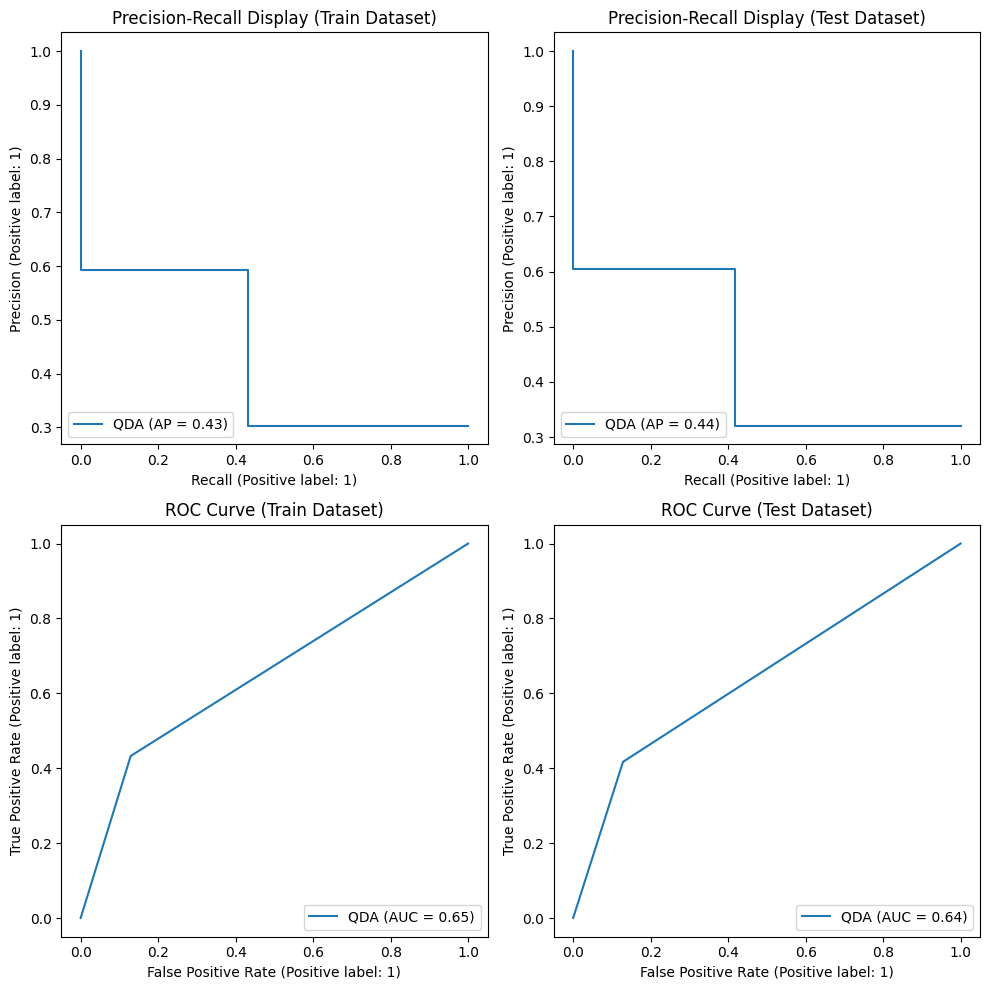

In [42]:
viz_pr_roc(qda_pipeline, name= "QDA")

#### 2. Cross- Validation & Hyperparameter Tuning

In [43]:
%%time
qda_params= {
    "model__reg_param": Real(1e-9, 1, prior= "log-uniform"),
    "model__store_covariance": Categorical([True, False]),
    "model__tol": Real(1e-4, 1, prior= "log-uniform")
}
best_qda= find_best_estimator(qda_pipeline, qda_params)

print(crossval_scores(best_qda))

{'accuracy': '0.7889999999999999 ± 0.00671267457873536', 'precision_macro': '0.6908399999999999 ± 0.009644397337314554', 'recall_macro': '0.67876 ± 0.006794291721732318', 'f1': '0.50226 ± 0.011359859154056465', 'f1_macro': '0.6841799999999999 ± 0.007871315010847944'}
CPU times: user 3min 5s, sys: 2min 14s, total: 5min 20s
Wall time: 2min 39s


In [44]:
best_qda.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7edfd2547d00>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                  

In [45]:
ma_b_qda= model_analysis(best_qda, name= "best svc")
ma_b_qda

{'model name': 'best svc',
 'balanced accuracy (train dataset)': 0.6797,
 'balanced accuracy (test dataset)': 0.6781,
 'precision (train dataset)': 0.5271,
 'precision (test dataset)': 0.5234,
 'recall (train dataset)': 0.4824,
 'recall (test dataset)': 0.4804,
 'f1 score(train dataset)': 0.5038,
 'f1 score(test dataset)': 0.501,
 'roc_auc (train dataset)': 0.6797,
 'roc_auc (test dataset)': 0.6781}

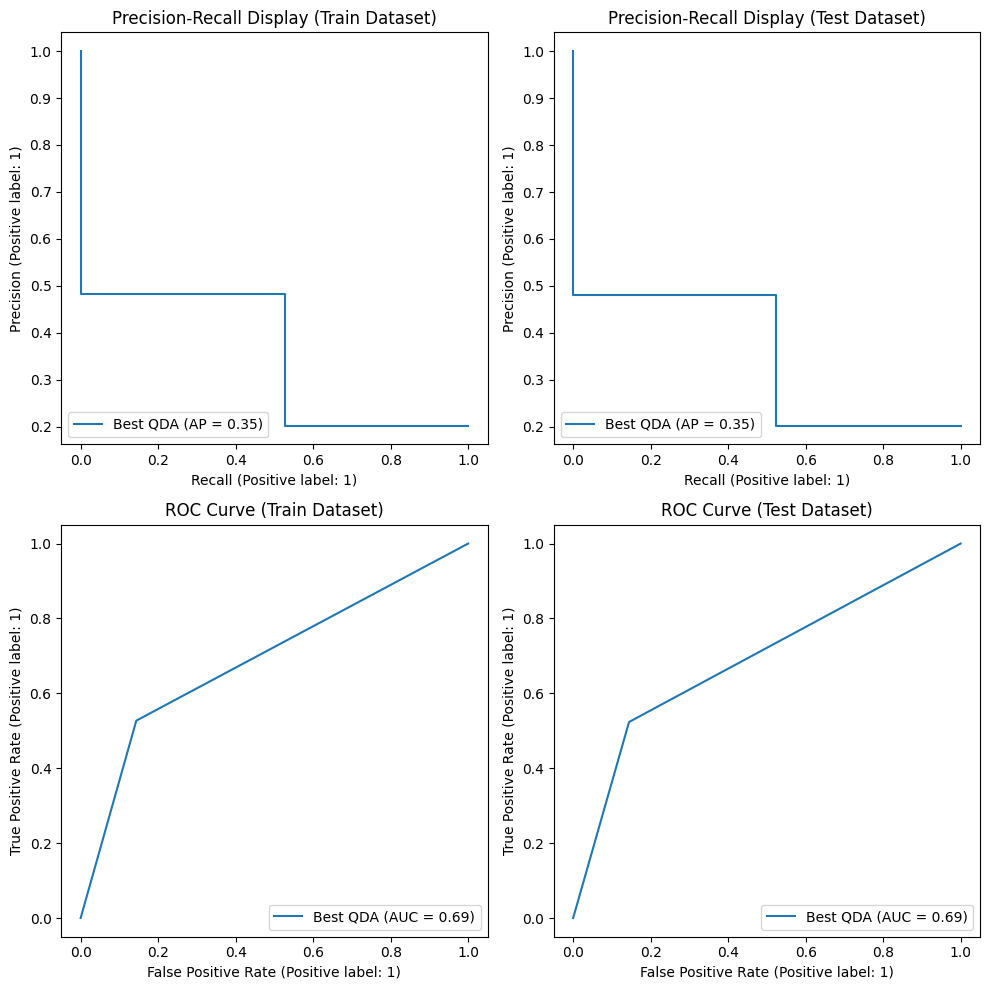

In [46]:
viz_pr_roc(best_qda, name= "Best QDA")

In [3]:
best_qda_w_pca= pipeline_w_pca(best_qda)
print(crossval_scores(best_qda_w_pca))

{'balanced_accuracy': '0.6648 ± 0.0064', 'precision': '0.569 ± 0.0107', 'recall': '0.42 ± 0.0142', 'f1': '0.4831 ± 0.0111', 'roc_auc': '0.7592 ± 0.0034'}


In [4]:
best_qda_w_pca.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7e614cc3a3b0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,


In [5]:
ma_b_qda_w_pca= model_analysis(model= best_qda_w_pca, name= "best qda w/ pca")
ma_b_qda_w_pca

{'model name': 'best qda w/ pca',
 'balanced accuracy (train dataset)': 0.6655,
 'balanced accuracy (test dataset)': 0.6577,
 'precision (train dataset)': 0.57,
 'precision (test dataset)': 0.5525,
 'recall (train dataset)': 0.4212,
 'recall (test dataset)': 0.4098,
 'f1 score(train dataset)': 0.4845,
 'f1 score(test dataset)': 0.4706,
 'roc_auc (train dataset)': 0.6655,
 'roc_auc (test dataset)': 0.6577}

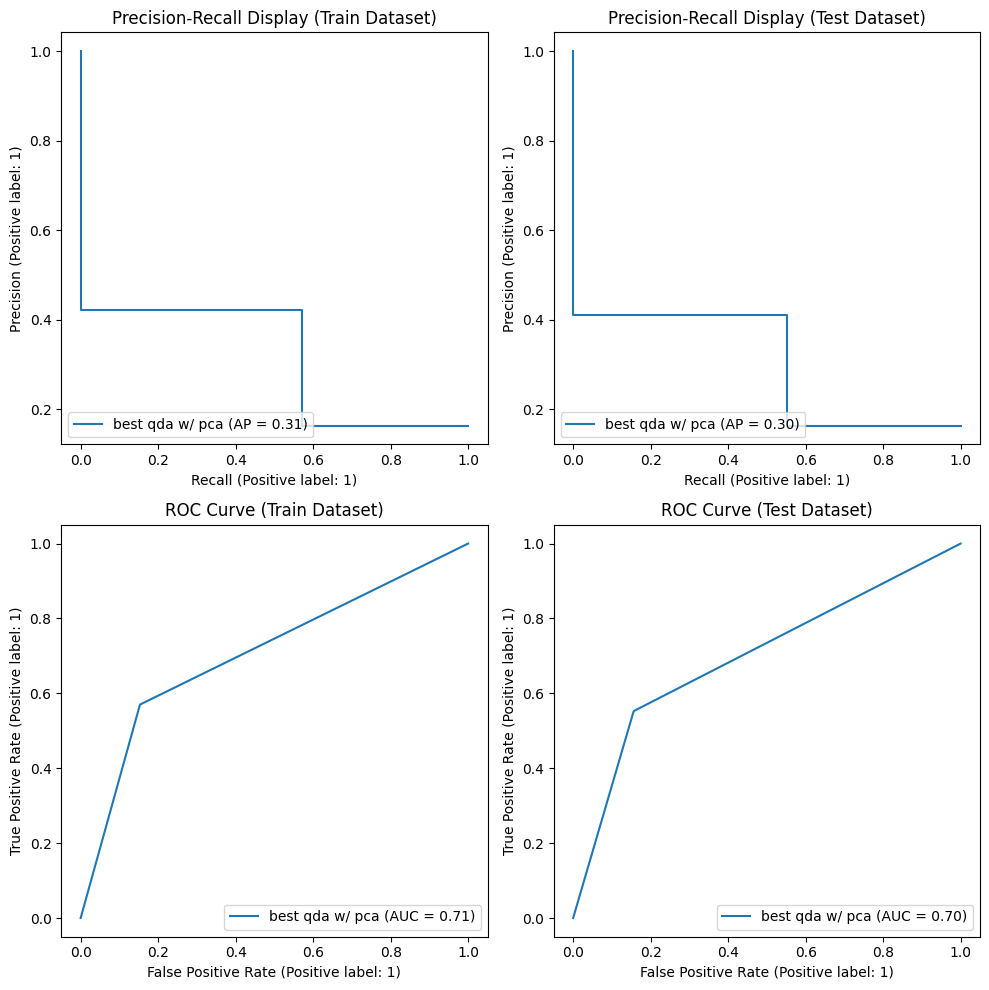

In [6]:
viz_pr_roc(model= best_qda_w_pca, name= "best qda w/ pca")

##### Which hyperparameter optimization technique have you used and why?

I used BayesSearchCV for hyperparameter optimization with a Quadriatic Discriminant Analysis (QDA) model. The hyperparameter search space for QDA included "reg_param," "store_covariance," and "tol." In my preprocessing pipeline, I scaled numerical columns, handled outliers using the IQR method coupled with PowerTransformer, and addressed missing values using SimpleImputer. I employed multiple evaluation metrics, including recall, precision, F1 score, balanced accuracy, and ROC-AUC. I encapsulated the data preprocessing steps, including outlier treatment, within a pipeline to avoid data leakage.

I employed PCA with n_components=14 to address potential multicollinearity and prevent overfitting. In terms of feature engineering, I handled categorical variables using techniques such as ordinal encoding and one-hot encoding. To address class imbalance, I used ROC AUC as the scoring parameter in BayesSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2
> Gaussian Naive Bayes

In [52]:
gnb_pipeline= basic_pipeline(GaussianNB())
print(crossval_scores(gnb_pipeline))

{'accuracy': '0.77094 ± 0.006386736255709931', 'precision_macro': '0.6702199999999999 ± 0.0065233120422067675', 'recall_macro': '0.6746800000000001 ± 0.006061484966573781', 'f1': '0.49232 ± 0.008919506712817691', 'f1_macro': '0.67218 ± 0.005731805998112639'}


In [53]:
#fitting
gnb_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7edfd2547d00>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                   SimpleImputer(missing_values='0',
                                                                                 strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                        

In [54]:
ma_gnb= model_analysis(model= gnb_pipeline, name= "gnb")
ma_gnb

{'model name': 'gnb',
 'balanced accuracy (train dataset)': 0.6743,
 'balanced accuracy (test dataset)': 0.6793,
 'precision (train dataset)': 0.4825,
 'precision (test dataset)': 0.482,
 'recall (train dataset)': 0.5016,
 'recall (test dataset)': 0.5162,
 'f1 score(train dataset)': 0.4918,
 'f1 score(test dataset)': 0.4985,
 'roc_auc (train dataset)': 0.6743,
 'roc_auc (test dataset)': 0.6793}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

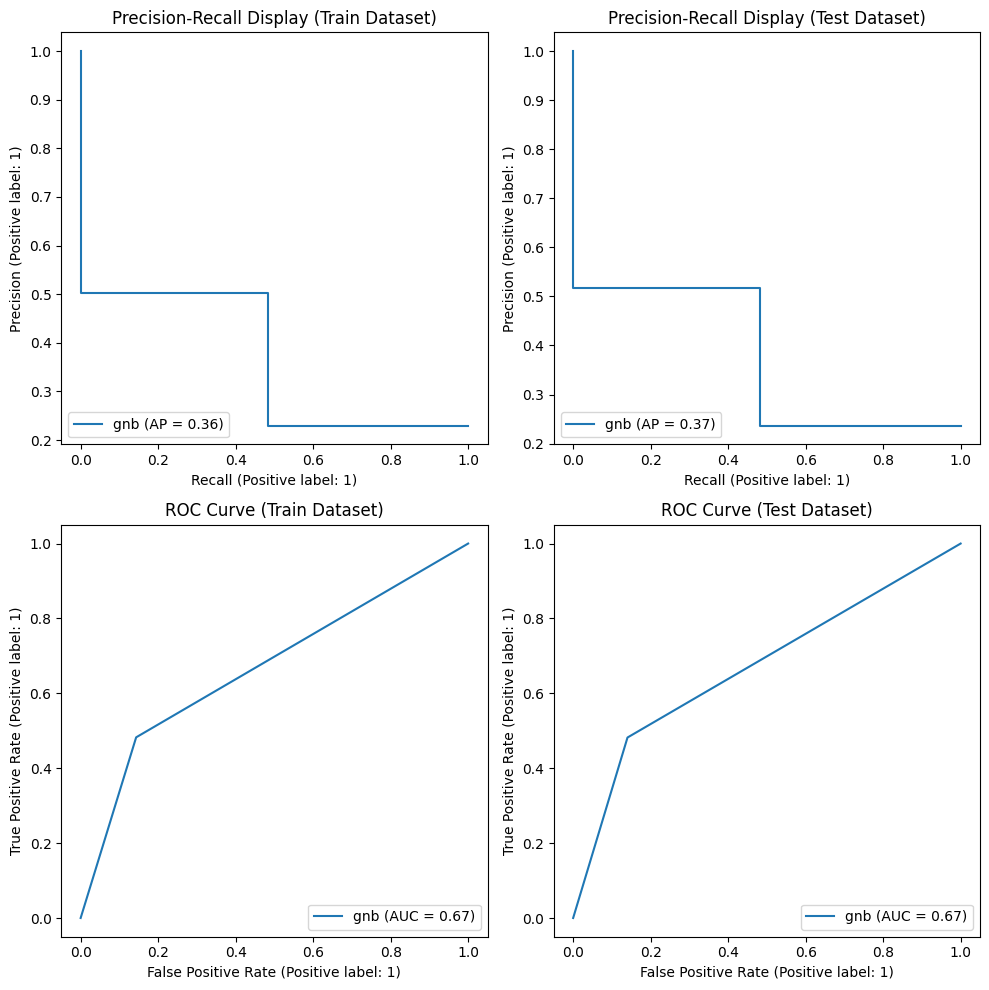

In [55]:
# Visualizing evaluation Metric Score chart
viz_pr_roc(model= gnb_pipeline, name= "gnb")

#### 2. Cross- Validation & Hyperparameter Tuning

In [56]:
%%time
gnb_params= {
    "model__var_smoothing": Real(1e-9, 0.1, prior= "log-uniform")
}
best_gnb= find_best_estimator(gnb_pipeline, param_grid= gnb_params)

print(crossval_scores(best_gnb))

{'accuracy': '0.7762 ± 0.006168954530550532', 'precision_macro': '0.6761 ± 0.006289356087867795', 'recall_macro': '0.6771199999999999 ± 0.004747378223819956', 'f1': '0.4968 ± 0.00706569175665057', 'f1_macro': '0.6764399999999999 ± 0.0048264272500473885'}
CPU times: user 2min 23s, sys: 1min 53s, total: 4min 16s
Wall time: 2min 11s


In [57]:
best_gnb.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7edfd2547d00>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                       

In [58]:
ma_b_gnb= model_analysis(best_gnb,name= "best gnb")
ma_b_gnb

{'model name': 'best gnb',
 'balanced accuracy (train dataset)': 0.6759,
 'balanced accuracy (test dataset)': 0.6804,
 'precision (train dataset)': 0.4931,
 'precision (test dataset)': 0.4911,
 'recall (train dataset)': 0.497,
 'recall (test dataset)': 0.5112,
 'f1 score(train dataset)': 0.4951,
 'f1 score(test dataset)': 0.501,
 'roc_auc (train dataset)': 0.6759,
 'roc_auc (test dataset)': 0.6804}

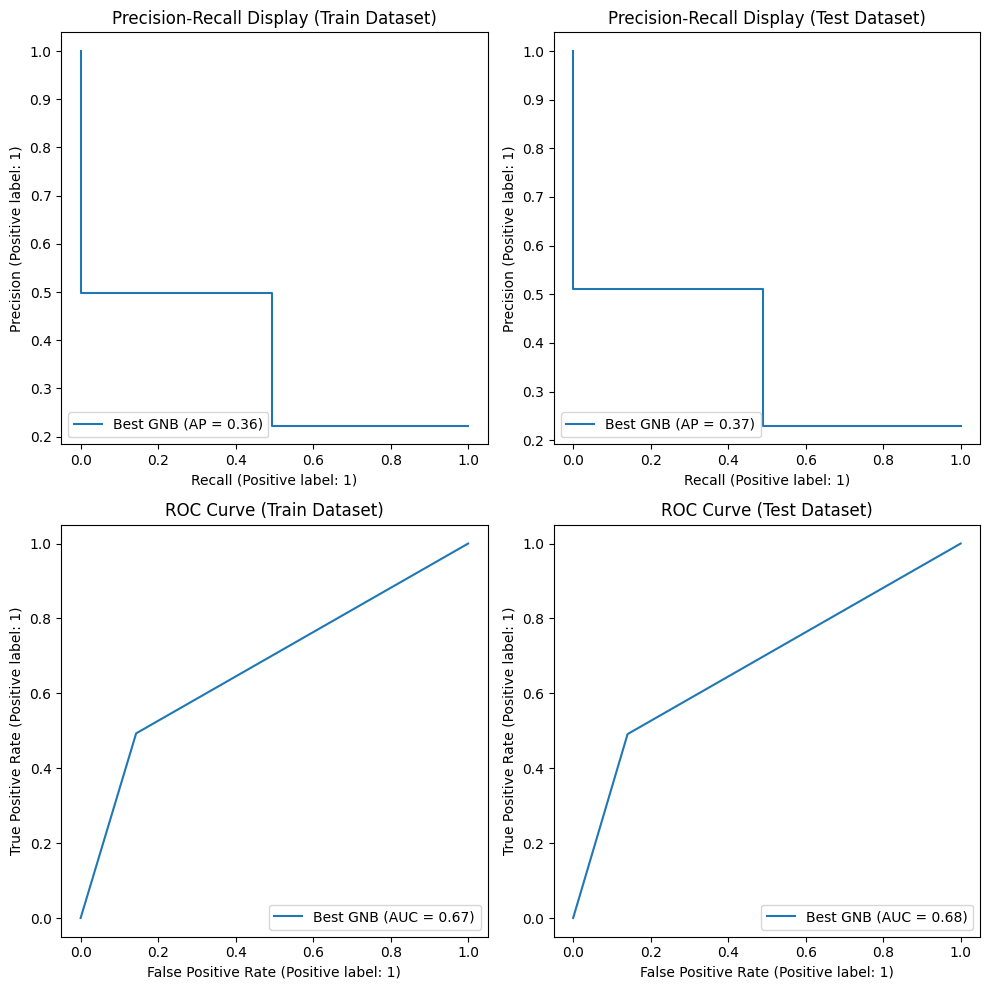

In [59]:
viz_pr_roc(best_gnb, name= "Best GNB")

In [7]:
best_gnb_w_pca= pipeline_w_pca(best_gnb)
print(crossval_scores(best_gnb_w_pca))

{'balanced_accuracy': '0.5163 ± 0.0022', 'precision': '0.6999 ± 0.0569', 'recall': '0.0373 ± 0.0044', 'f1': '0.0707 ± 0.0081', 'roc_auc': '0.7561 ± 0.0042'}


In [8]:
best_gnb_w_pca.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7e614cc3a3b0>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                  

In [9]:
ma_b_gnb_w_pca= model_analysis(best_gnb_w_pca, name= "best gnb w/ pca")
ma_b_gnb_w_pca

{'model name': 'best gnb w/ pca',
 'balanced accuracy (train dataset)': 0.5166,
 'balanced accuracy (test dataset)': 0.5204,
 'precision (train dataset)': 0.7,
 'precision (test dataset)': 0.728,
 'recall (train dataset)': 0.0377,
 'recall (test dataset)': 0.0458,
 'f1 score(train dataset)': 0.0716,
 'f1 score(test dataset)': 0.0861,
 'roc_auc (train dataset)': 0.5166,
 'roc_auc (test dataset)': 0.5204}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 3

> #### Random Forest Classifier

In [63]:
# ML Model - 3 Implementation

rf_pipeline= basic_pipeline(RandomForestClassifier())
print(crossval_scores(rf_pipeline))

{'accuracy': '0.81444 ± 0.002745614685275417', 'precision_macro': '0.7409600000000001 ± 0.007123650749440201', 'recall_macro': '0.6531600000000001 ± 0.005421660262318191', 'f1': '0.46449999999999997 ± 0.010411532067856308', 'f1_macro': '0.67614 ± 0.005631198806648559'}


In [64]:
# Fit the Algorithm
rf_pipeline.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7edfd2547d00>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                                 strategy='most_frequent')),
                                                                  ('One Hot '
                                                                   'Encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
           

In [65]:
ma_rf= model_analysis(model= rf_pipeline, name= "rf")
ma_rf

{'model name': 'rf',
 'balanced accuracy (train dataset)': 0.999,
 'balanced accuracy (test dataset)': 0.66,
 'precision (train dataset)': 0.9988,
 'precision (test dataset)': 0.6582,
 'recall (train dataset)': 0.9983,
 'recall (test dataset)': 0.3754,
 'f1 score(train dataset)': 0.9986,
 'f1 score(test dataset)': 0.4781,
 'roc_auc (train dataset)': 0.999,
 'roc_auc (test dataset)': 0.66}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

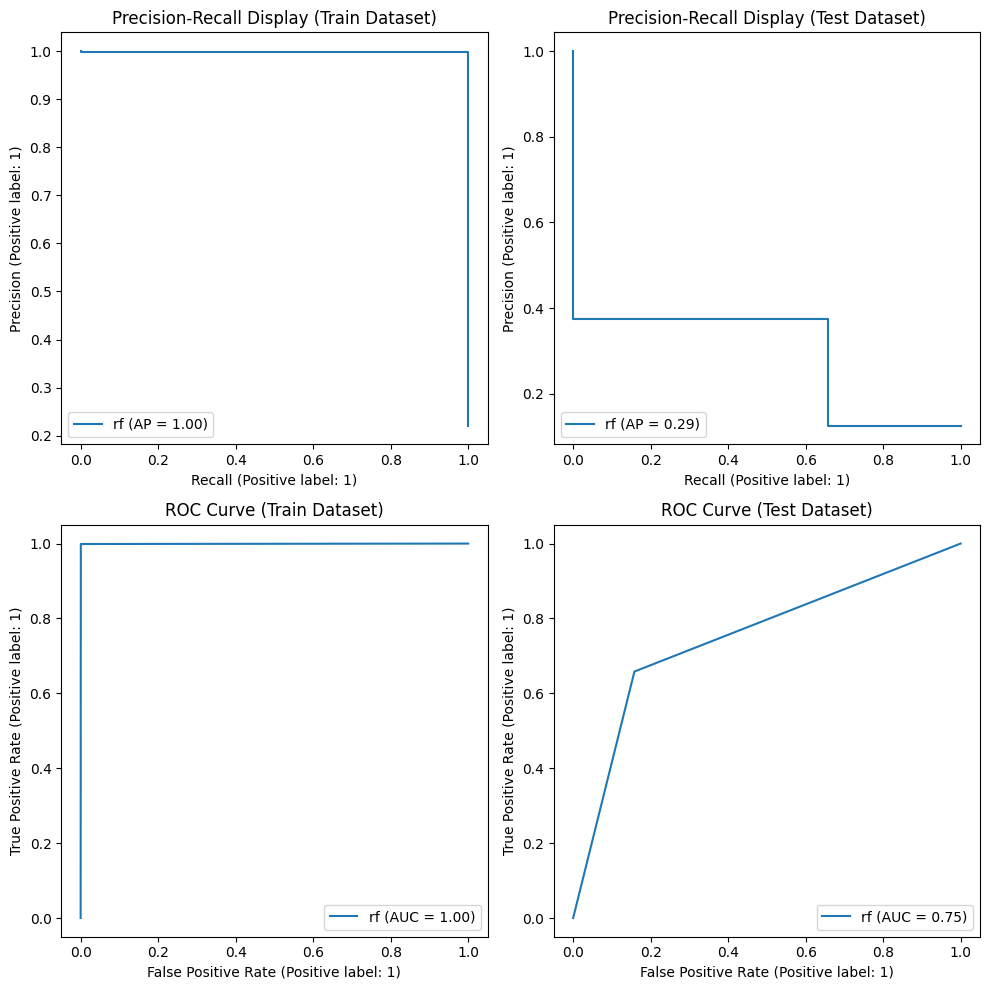

In [66]:
# Visualizing evaluation Metric Score chart
viz_pr_roc(model= rf_pipeline, name= "rf")

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
%%time
rf_params= {
    "model__n_estimators": Integer(10, 500, prior= "log-uniform"),
    "model__max_depth": Integer(10, 100, prior= "log-uniform"),
    "model__max_features": Categorical(["sqrt", "log2", None]),
    "model__bootstrap": Categorical([True, False]),
    "model__warm_start": Categorical([True, False]),
}
best_rf= find_best_estimator(rf_pipeline, param_grid= rf_params)
print(crossval_scores(best_rf))

{'accuracy': '0.8149200000000001 ± 0.002766514052015637', 'precision_macro': '0.74214 ± 0.007879746188805813', 'recall_macro': '0.65382 ± 0.003130111819088899', 'f1': '0.46588 ± 0.00604099329580822', 'f1_macro': '0.67696 ± 0.003443021928480852'}
CPU times: user 5min 7s, sys: 2min 45s, total: 7min 52s
Wall time: 47min 55s


In [68]:
best_rf.fit(X_train, y_train_processed)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('Processing Numerical '
                                                  'Columns',
                                                  Pipeline(steps=[('scaling',
                                                                   PowerTransformer()),
                                                                  ('outlier '
                                                                   'treatment',
                                                                   FunctionTransformer(func=<function outlier_treatment at 0x7edfd2547d00>))]),
                                                  [0, 4, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22]),
                                                 ('One Hot Encoding column '
                                                  "'sex'",
                                                  OneHotEncoder(drop='first'),
                                                  [1]...
                                                                   OneHotEncoder(drop='first'))]),
                                                  [3]),
                                                 ("Ordinal Encoding 'pay_' "
                                                  'columns',
                                                  OrdinalEncoder(categories=[[-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8],
                                                                             [-2,
                                                                              -1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                  

In [69]:
ma_b_rf= model_analysis(model= best_rf, name= "best rf")
ma_b_rf

{'model name': 'best rf',
 'balanced accuracy (train dataset)': 0.9988,
 'balanced accuracy (test dataset)': 0.6631,
 'precision (train dataset)': 0.9993,
 'precision (test dataset)': 0.6602,
 'recall (train dataset)': 0.9978,
 'recall (test dataset)': 0.3821,
 'f1 score(train dataset)': 0.9986,
 'f1 score(test dataset)': 0.4841,
 'roc_auc (train dataset)': 0.9988,
 'roc_auc (test dataset)': 0.6631}

In [ ]:
best_rf_w_rfe= pipeline_w_rfe(best_rf)
print(crossval_scores(best_rf_w_rfe))

In [ ]:
best_rf_w_rfe.fit(X_train, y_train_processed)

In [ ]:
ma_best_rf_w_rfe= model_analysis(model= best_rf_w_rfe, name= "best rf w/ rfe")
ma_best_rf_w_rfe

In [ ]:
best_rf_w_pca= pipeline_w_pca(best_rf)
print(crossval_scores(best_rf_w_pca))

In [ ]:
best_rf_w_pca.fit(X_train, y_train_processed)

In [ ]:
ma_b_rf_w_pca= model_analysis(best_rf_w_pca, name= "best rf w/ pca")
ma_b_rf_w_pca

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
pd.DataFrame([
    ma_rf, ma_b_rf, ma_b_rf_w_rfe, ma_b_rf_w_pca,
    ma_svc, ma_b_svc, ma_b_svc_w_pca,
    ma_gnb, ma_b_gnb, ma_b_w_pca,
]).sort_values("f1 score(test dataset)", ascending= False)

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***